# matplotlib 

The most common python plotting library is matplotlib. Matplotlib provides an advanced
object-oriented interface and a Matlab-like interface called **pyplot**

You can see some examples of it in action at
https://matplotlib.org/gallery.html

# matplotlib notebook

Matplotlib can interact with Jupyter in two different ways; "inline" and "notebook".  "Inline" mode writes static images directly into the output cell.
"notebook" mode creates an interactive output that the user can resize and zoom.

Changing between the two modes is problematic and therefore discouraged.  Best practice is to declare one at the beginning of your notebook using the appropriate line magic.  For example,

``` python
%matplotlib notebook
import matplotlib.pyplot as plt
```


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Simple Example

<IPython.core.display.Javascript object>


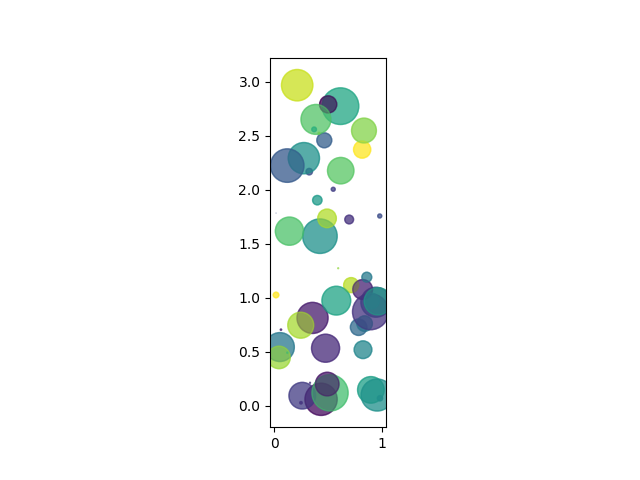

In [2]:
# generate some data
N = 50
xp = np.random.rand(N)
yp = 3*np.random.rand(N)
colors = np.random.rand(N)
radii = 15 * np.random.rand(N)
area = np.pi * radii**2  # 0 to 15 point radiuses

# plot the data
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)

# call show
plt.show()

## Setting The Aspect Ratio

You can easily fix the aspect ratio for the default plot.

In [3]:
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.axes().set_aspect('equal')
plt.show()

<div class="alert alert-warning">
<h1>What just happened???</h1>
In "Notebook" mode, matplotlib does not create new figures in each cell, it modifies the most recent figure.  You need to create a new one when needed.  For example,
</div>

<IPython.core.display.Javascript object>


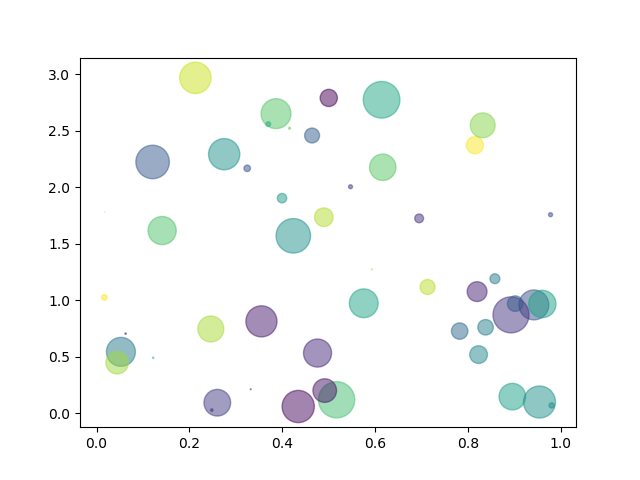

In [4]:
plt.figure()
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5);

## Modifying Previous Plots

If you call plt.figure() with a name, it will create a new one, unless one with that name already exists.  Lets create some new plots.

<IPython.core.display.Javascript object>


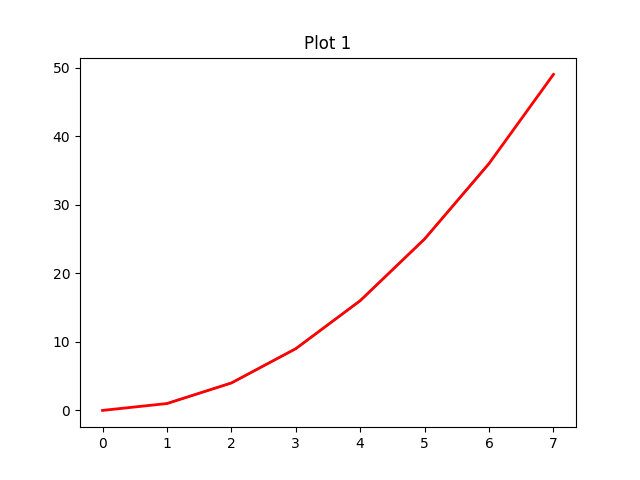

<IPython.core.display.Javascript object>


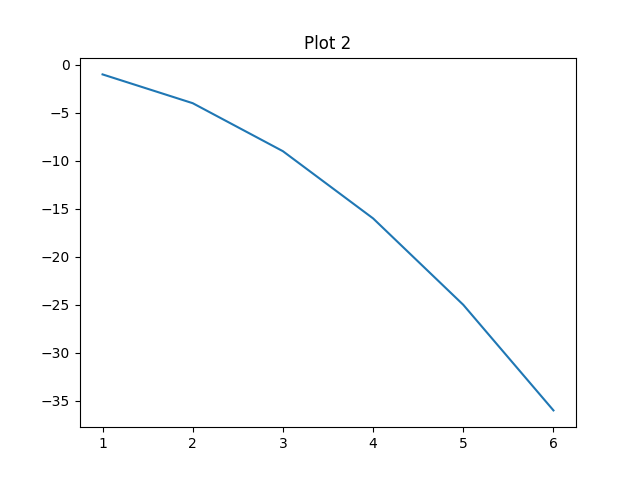

In [5]:
plt.figure("Line Plot 1")
plt.plot([1,2,3,4,5,6],[1,4,9,16,25,36])
plt.figure("Line Plot 2")
plt.plot([1,2,3,4,5,6],[-1,-4,-9,-16,-25,-36]);

In [6]:
# Lets modify the title of the seecond plot
plt.figure("Line Plot 2")
plt.title('Plot 2');

In [7]:
# And now modify the title of the first plot and add some data, change the color and linewidth
plt.figure("Line Plot 1")
plt.title('Plot 1')
plt.plot([0,1,2,3,4,5,6,7],[0,1,4,9,16,25,36,49], color='red', linewidth=2);

When using "notebook" mode, good practice is to always name your figures.  Because named figures
can be easily updated, this makes them ideal for animations and dashboards. 

## Controlling the Plot Size

Depending on your monitor, the plot may be hard to see.  You can specify a plot size in inches, and a DPI (dots-per-inch).

First, lets take a look at the defaults:

In [8]:
from __future__ import print_function
fig = plt.gcf();
dpi = fig.get_dpi();
size = fig.get_size_inches();
print("Default Size: %s.   Default DPI: %s" % (size, dpi))

Default Size: [ 6.4  4.8].   Default DPI: 100.0


Now, to make the image larger on the screen, we can either increase the DPI or the size.

<IPython.core.display.Javascript object>


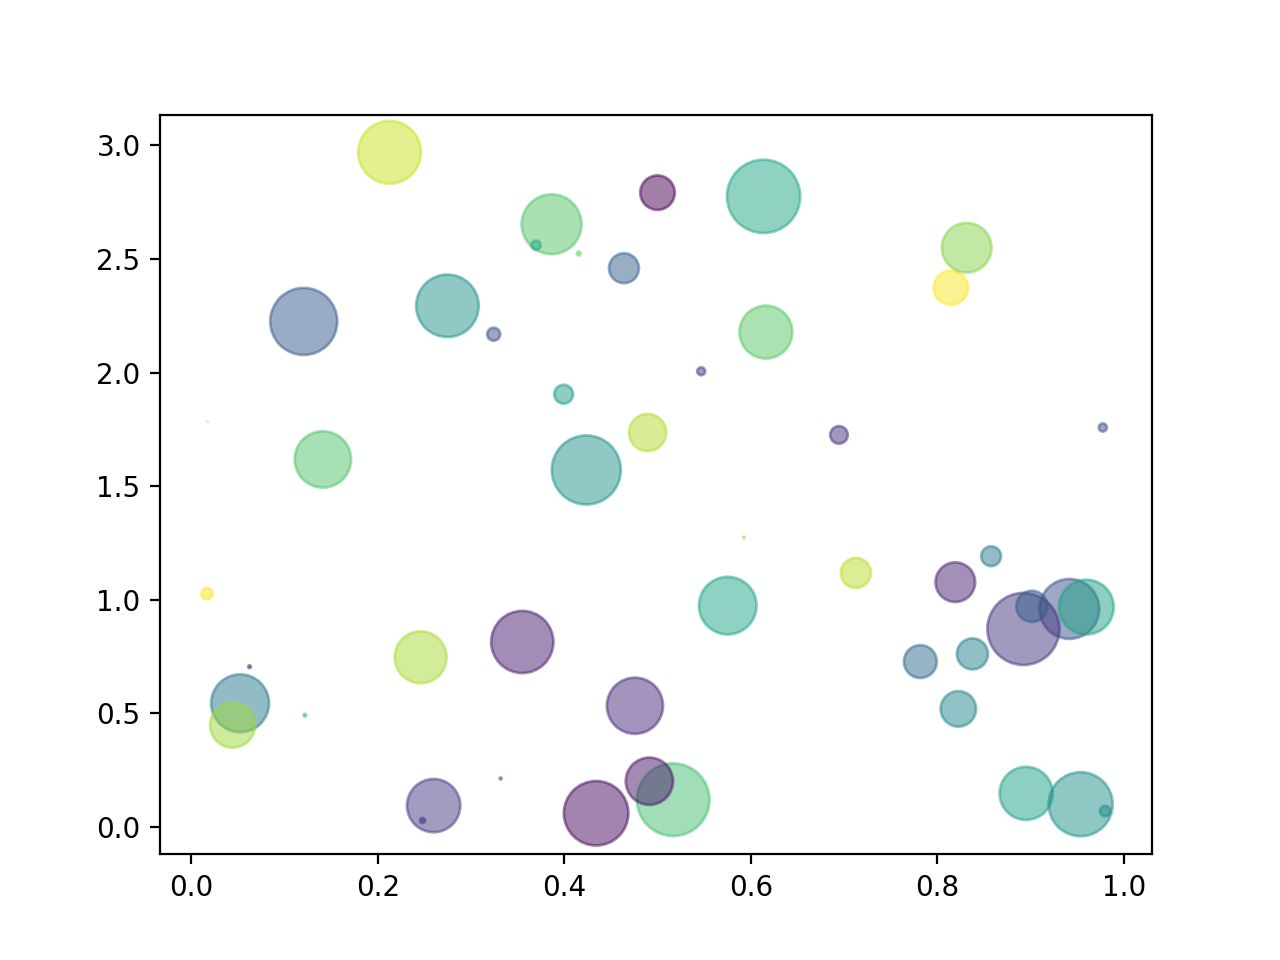

In [9]:
plt.figure(dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5);

You can set both the size and DPI at once.  Notice that setting the size also sets the aspect ratio.

<IPython.core.display.Javascript object>


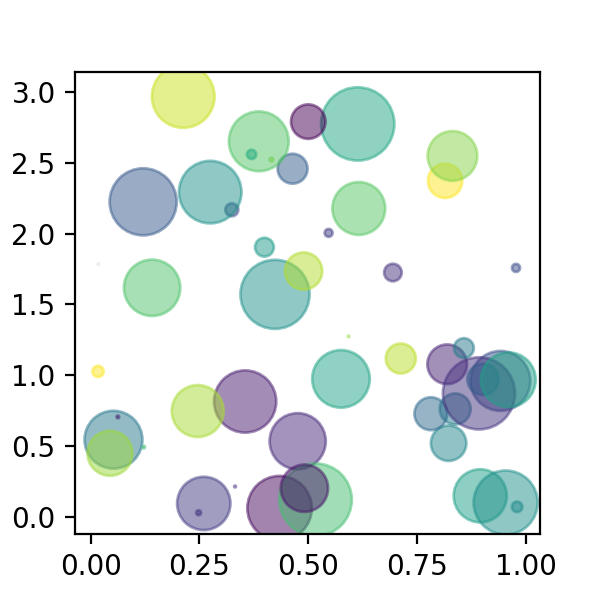

In [10]:
plt.figure(figsize=(3,3), dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5);

You can still adjust the aspect ratio later.

<IPython.core.display.Javascript object>


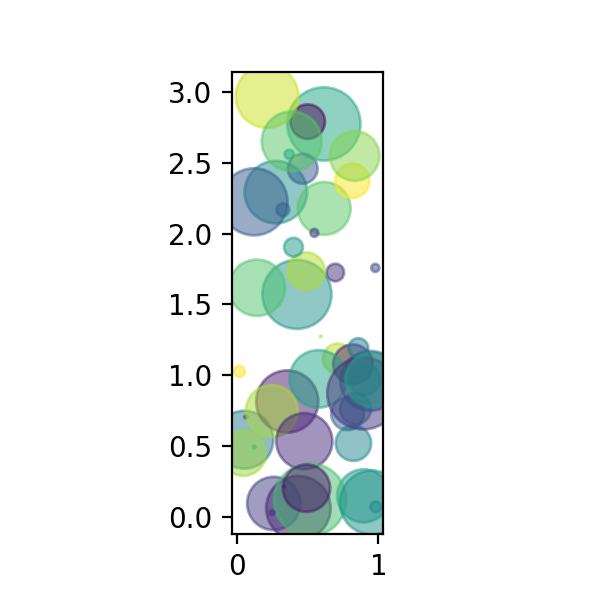

In [11]:
plt.figure(figsize=(3,3), dpi=200)
plt.axes().set_aspect('equal')
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5);

## Resizing Notebook Plots

Notebook plots do not resize with the browser.  Instead scrollbars appear.  However, you can resize the
plots by moving the bottom-right corner.  Try it...

## Interactive Use

<IPython.core.display.Javascript object>


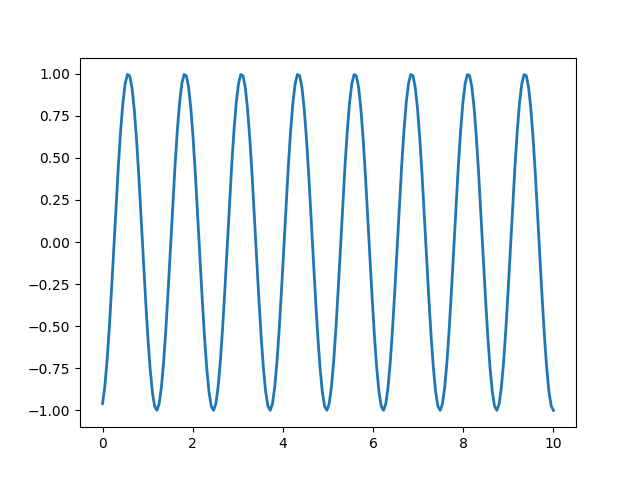

A Jupyter Widget

In [12]:
from ipywidgets import interact

# Clearing and redrawing entire plot
x = np.linspace(0,10,200)
plt.figure('Interactive Test 0')
def plot_sine(A, B):
    plt.clf()  # Clear Figure
    y = np.sin(A*x+B)
    plt.plot(x,y,linewidth=2)

interact(plot_sine, A=(1, 10), B=(0,10));

<IPython.core.display.Javascript object>


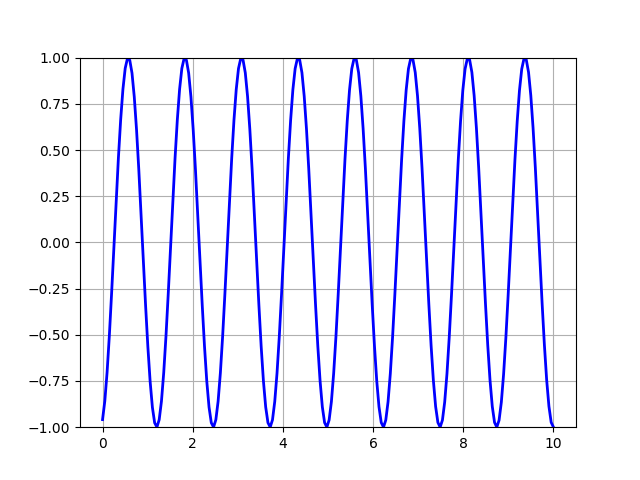

A Jupyter Widget

In [14]:
f = plt.figure('Interactive Test 1')
ax = f.add_subplot(111)
myline, = ax.plot(x, np.sin(0*x), 'b-', linewidth=2)
ax.set_ylim(-1, 1)
ax.grid(True)

# Updating ydata 
def plot_sine2(A, B):
    y = np.sin(A*x + B)
    myline.set_ydata(y)

interact(plot_sine2, A=(1, 10), B=(0,10));

## Animation

Animation using matplotlib requires use of matplotlib.animation.  You should check the examples in the matplotlib docs.

We recommend using JSAnimation to view animations in the notebook.

<IPython.core.display.Javascript object>


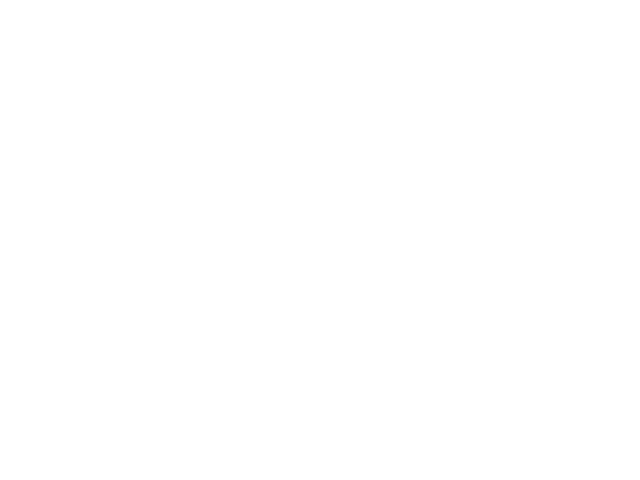

In [15]:
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
sline, = ax.plot(x, np.sin(0*x), 'k-', linewidth=2)
ax.set_ylim(-1, 1)

def myf(i):
    y = np.sin(i*x)
    sline.set_ydata(y)
    return sline,

anim = FuncAnimation(fig, myf, frames=np.linspace(0,10,100), interval=100, blit=True)


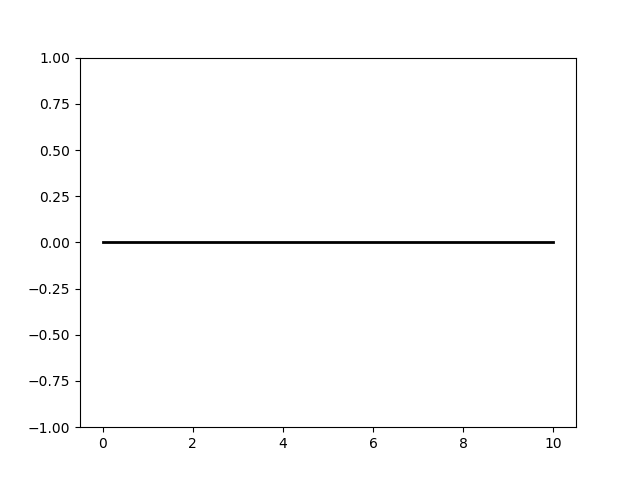
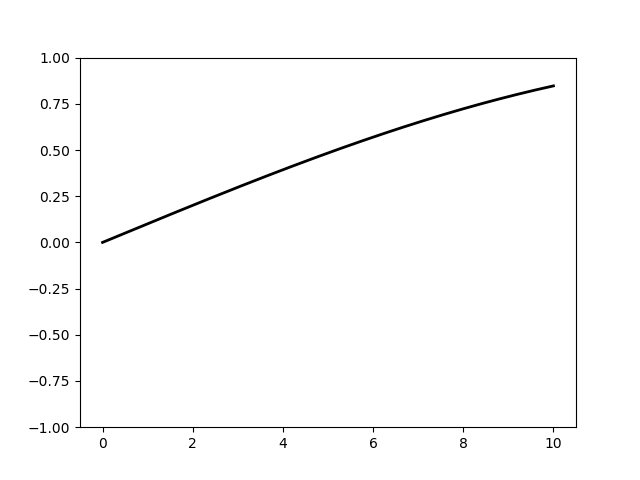
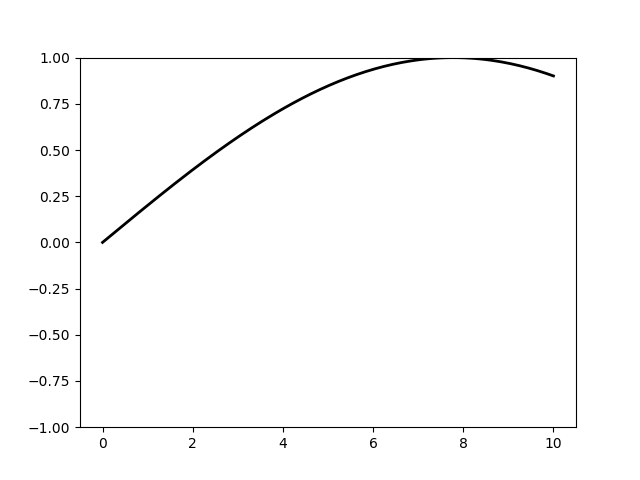
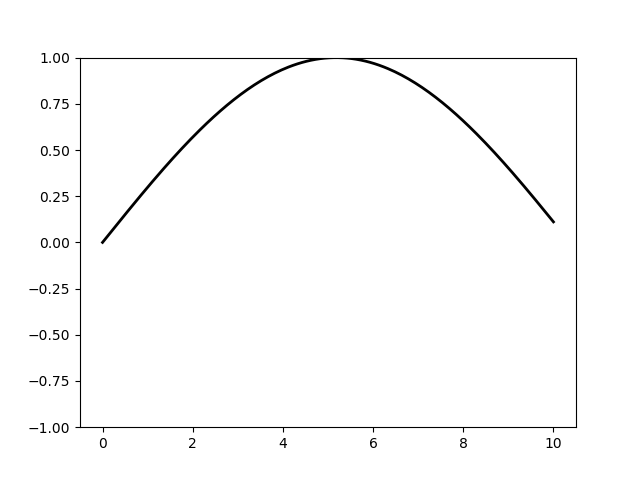
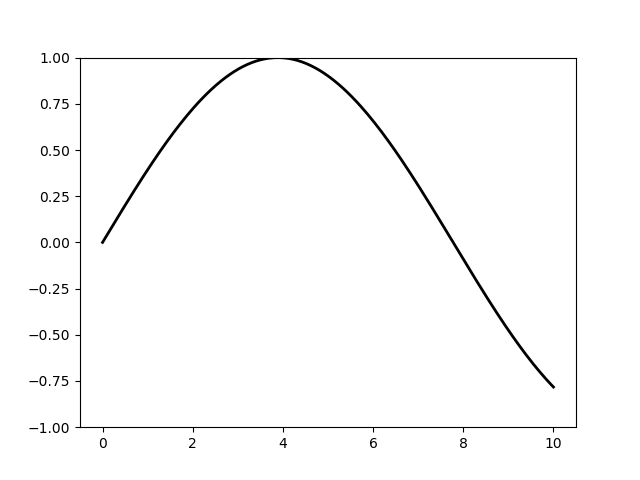
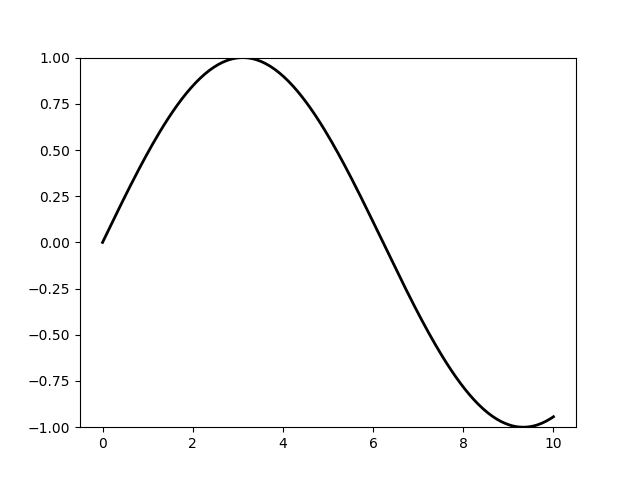
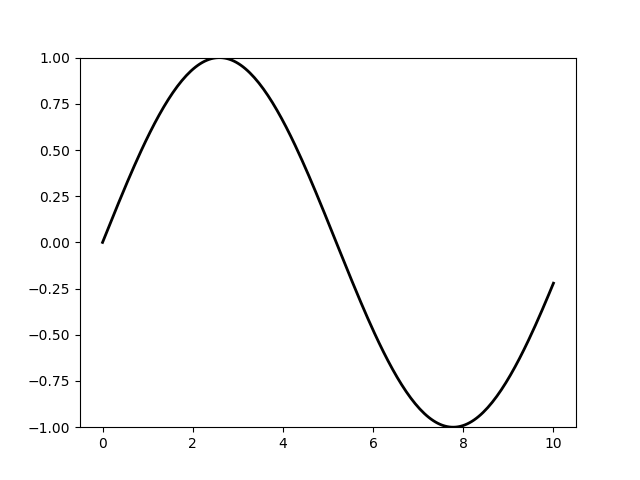
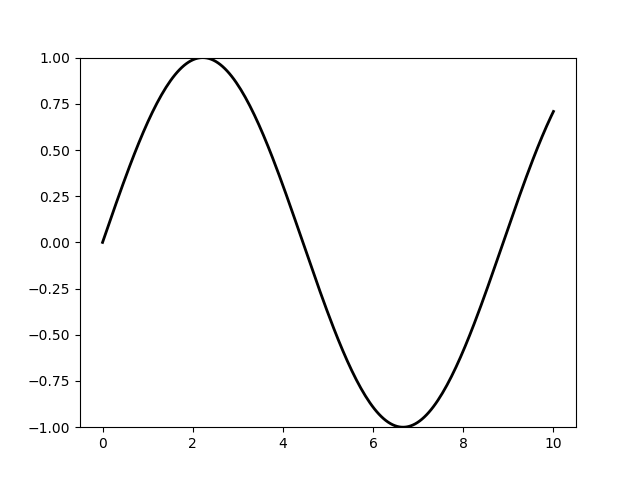
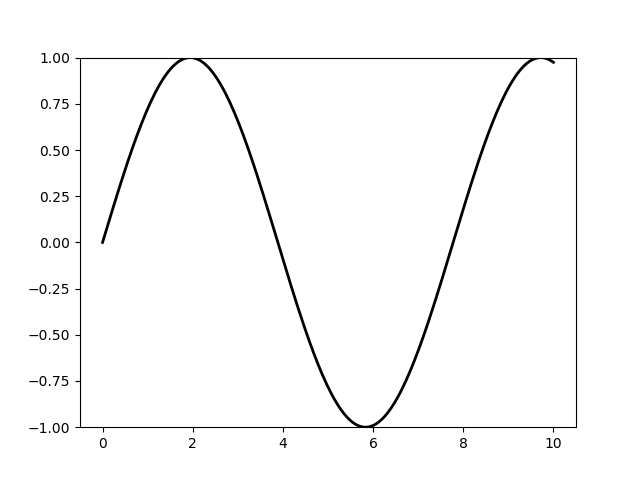
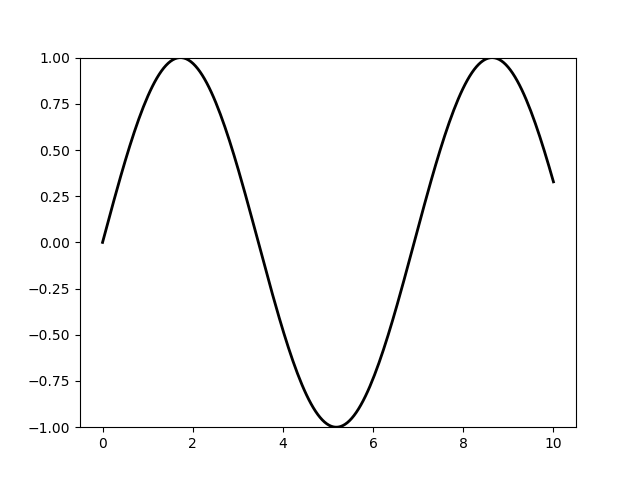
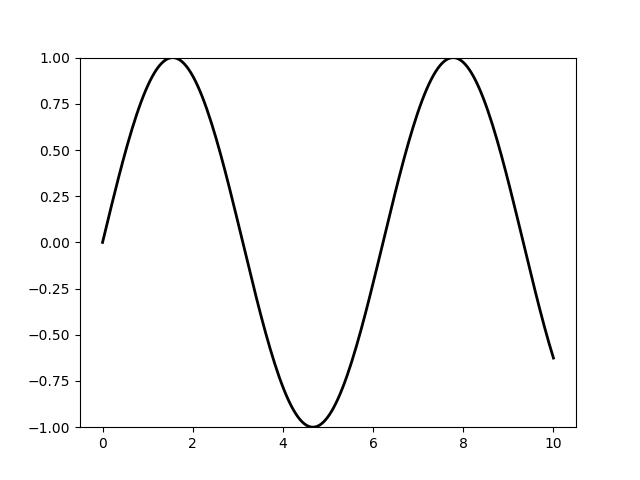
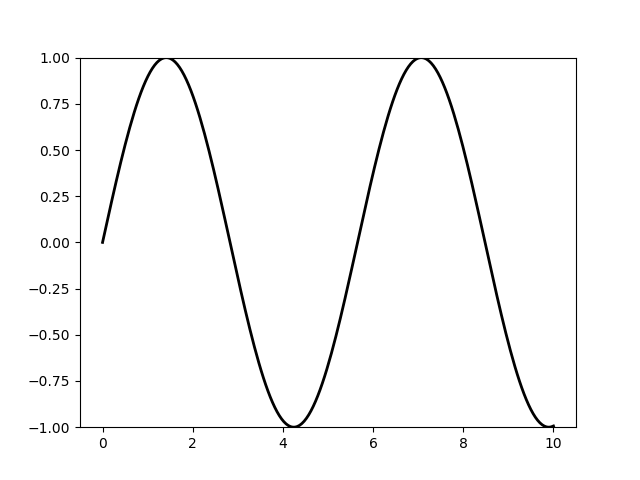
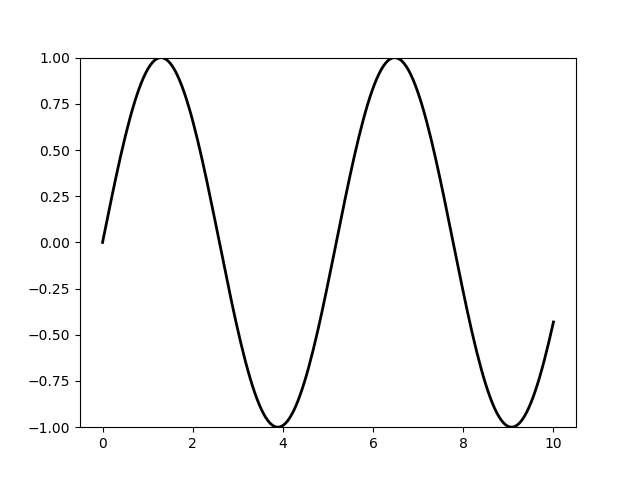
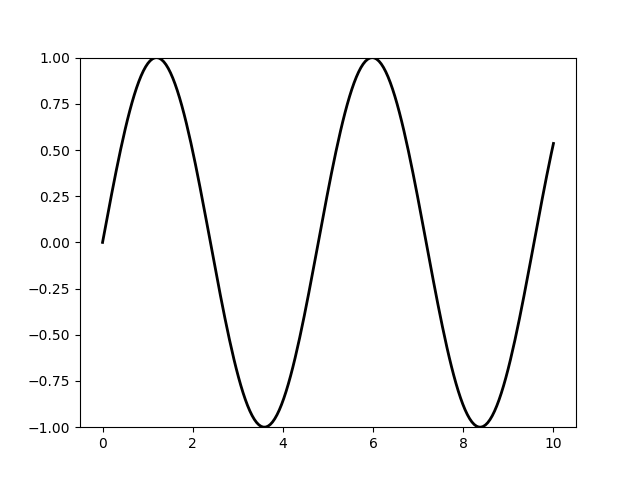
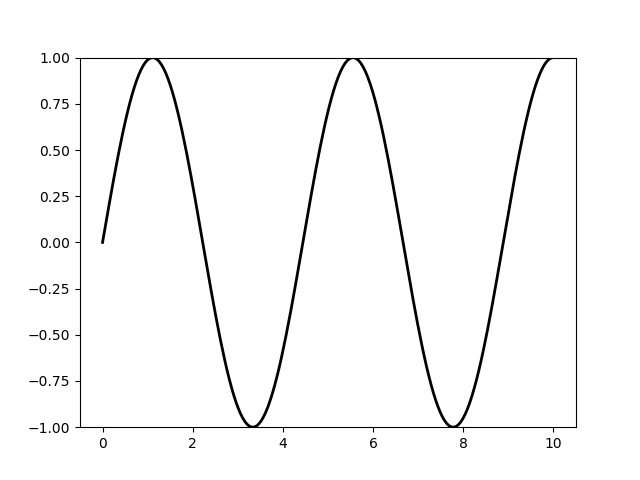
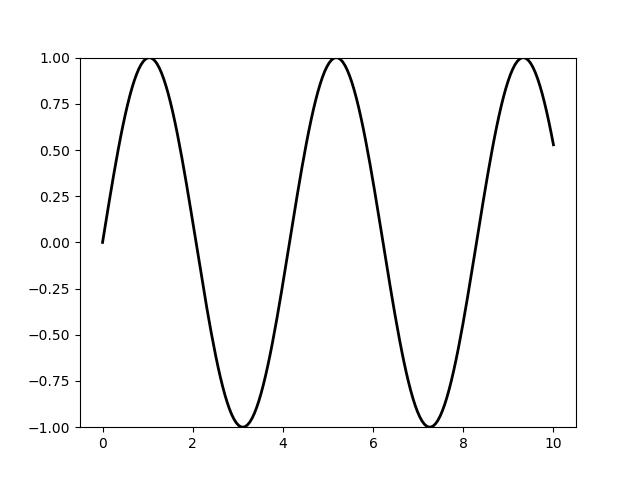
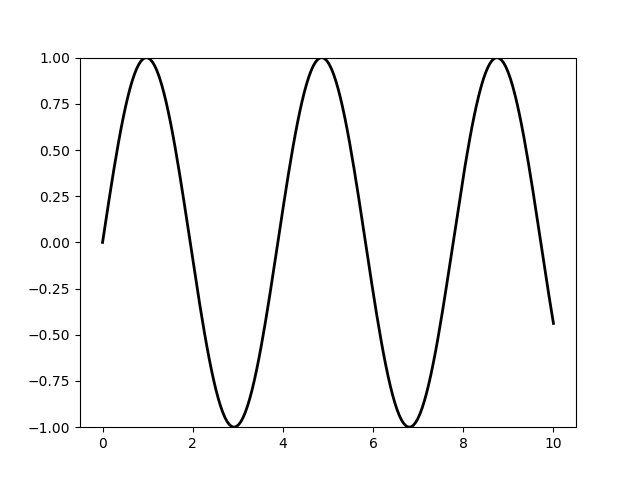
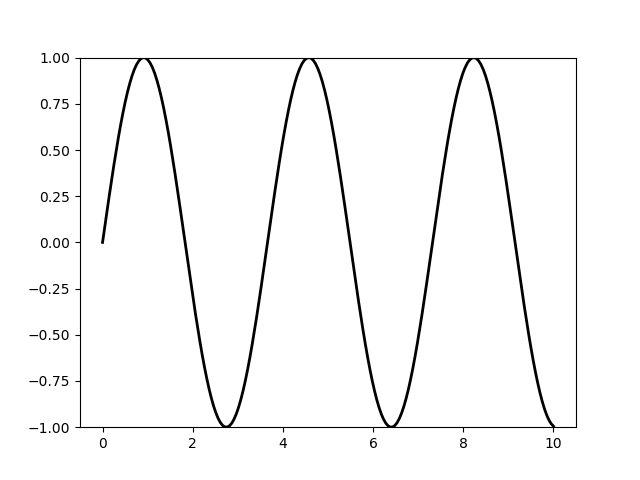
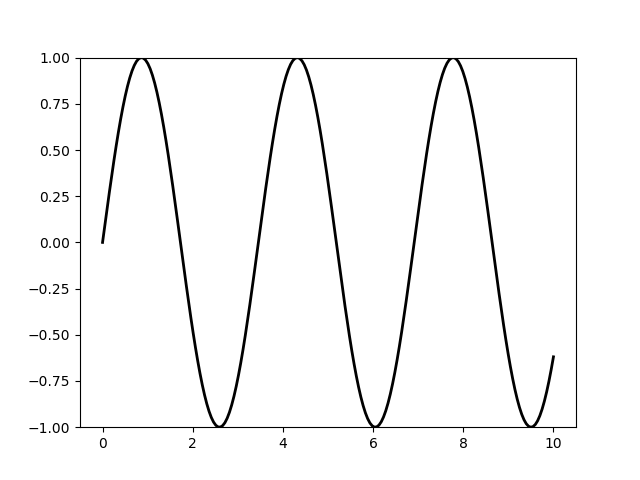
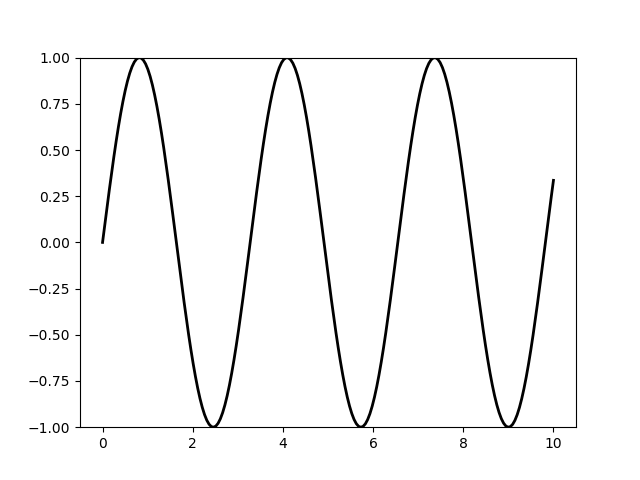
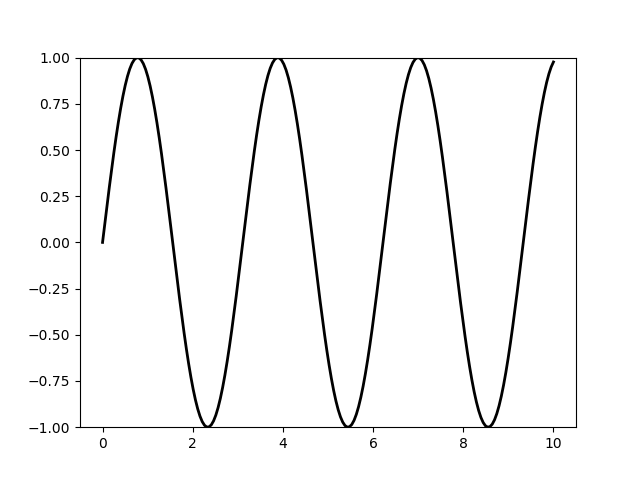
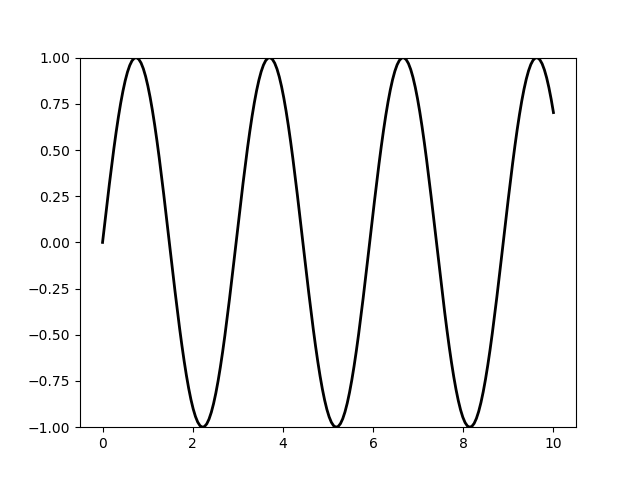
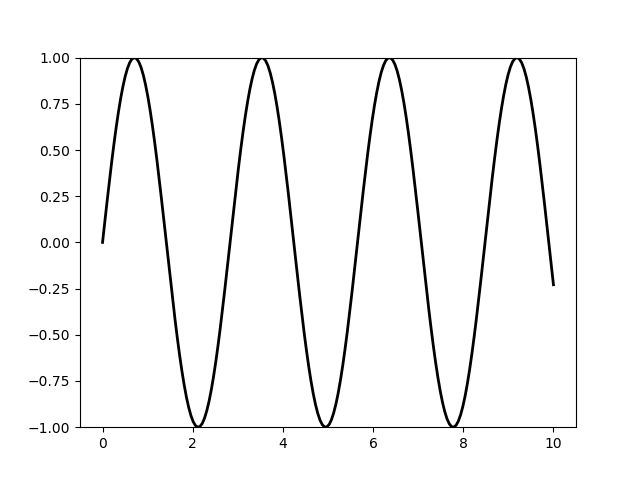
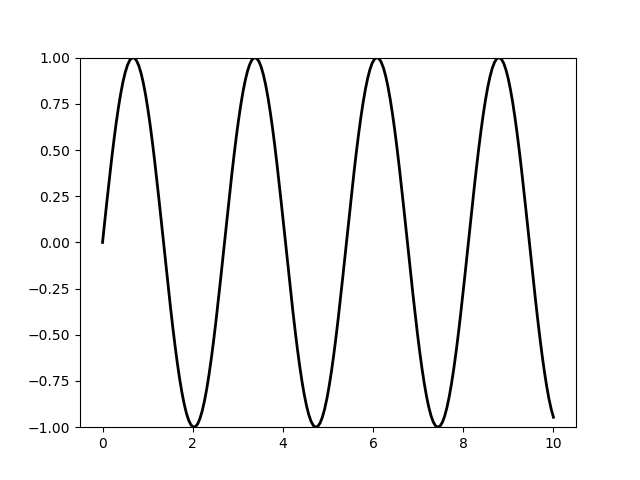
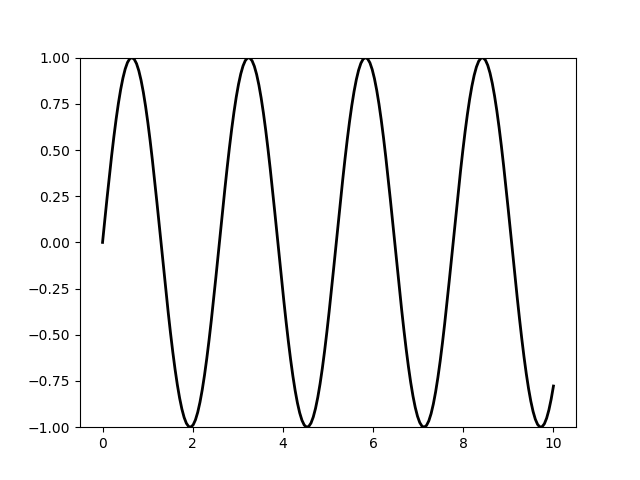
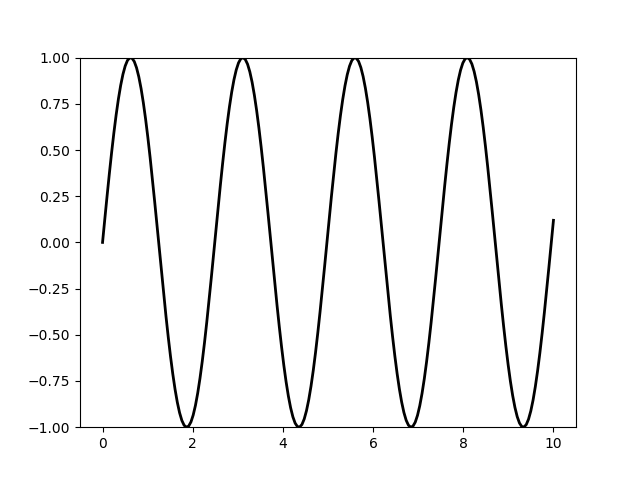
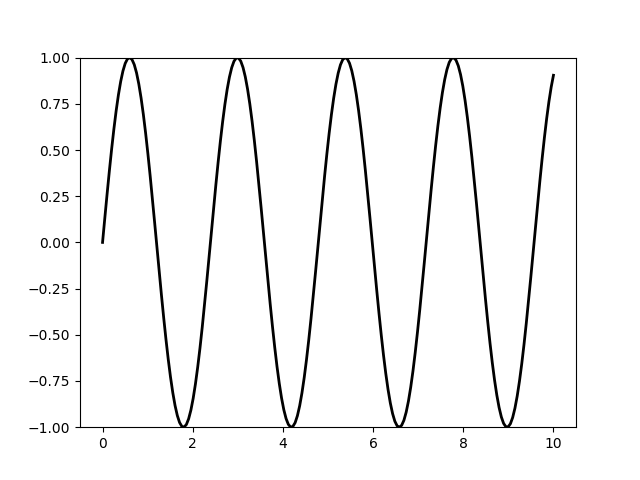
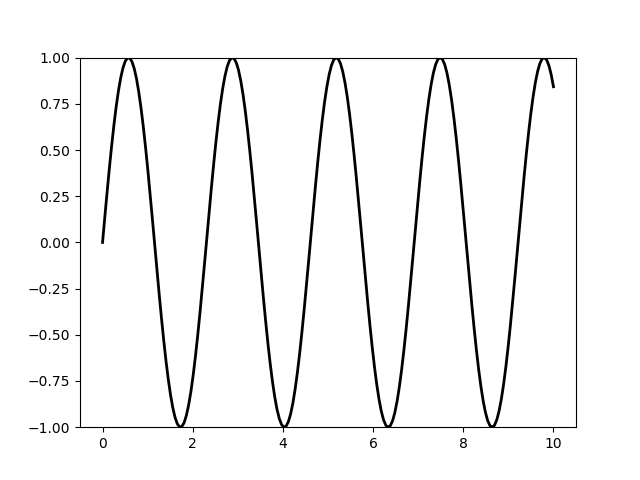
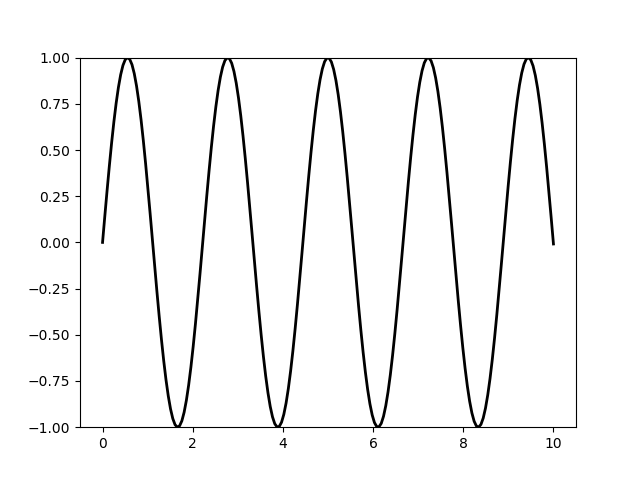
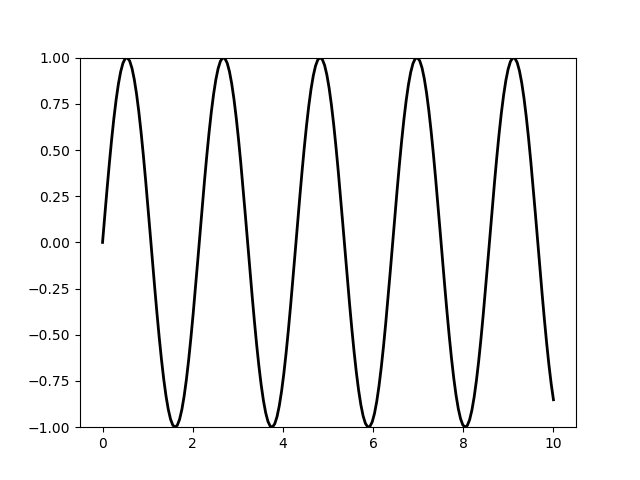
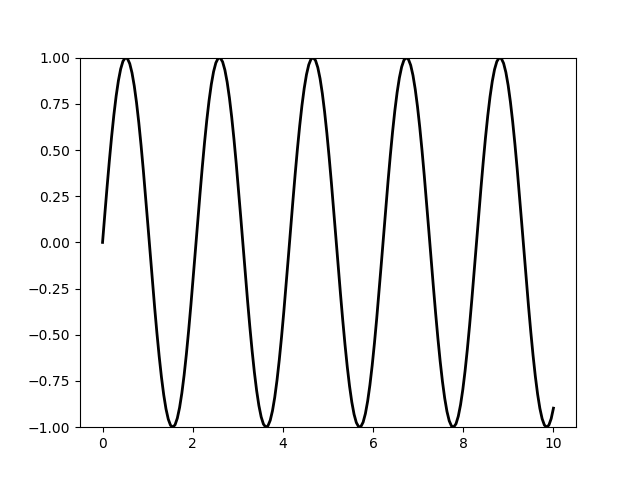
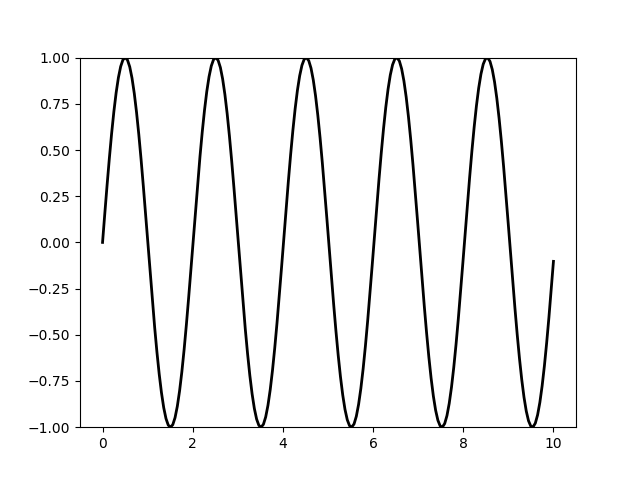
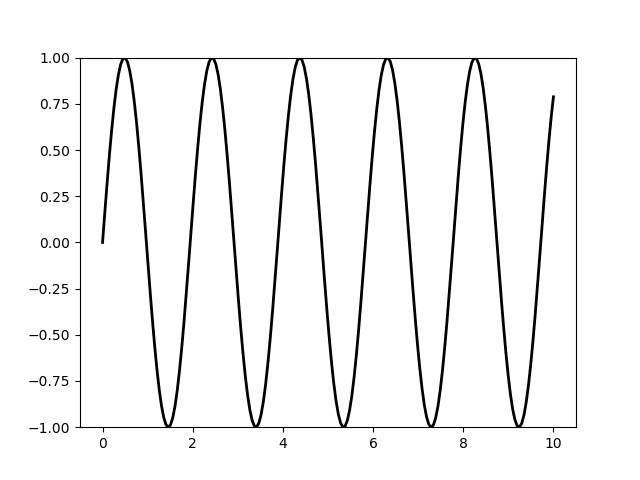
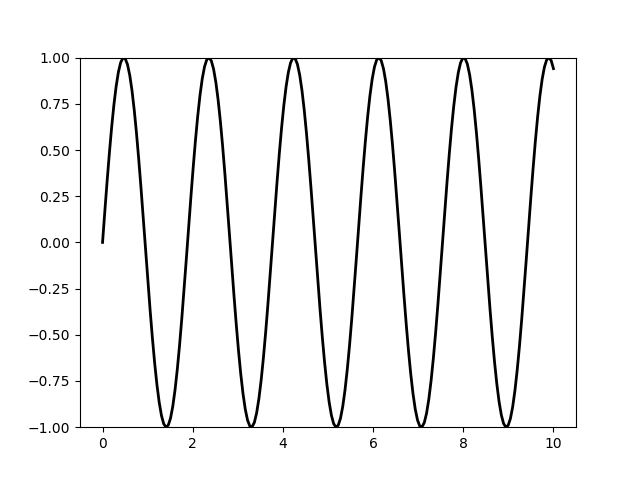
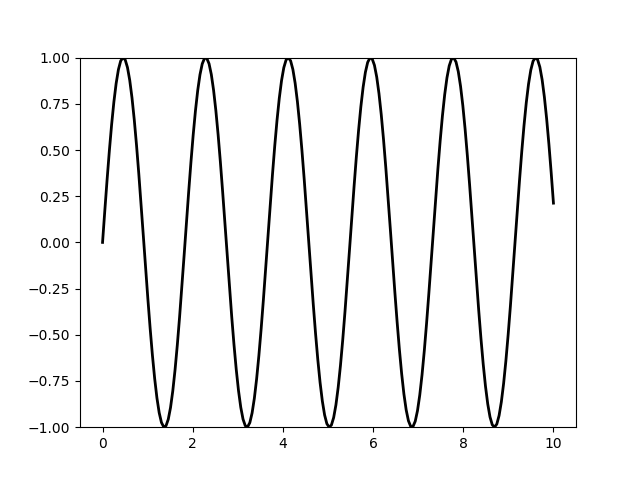
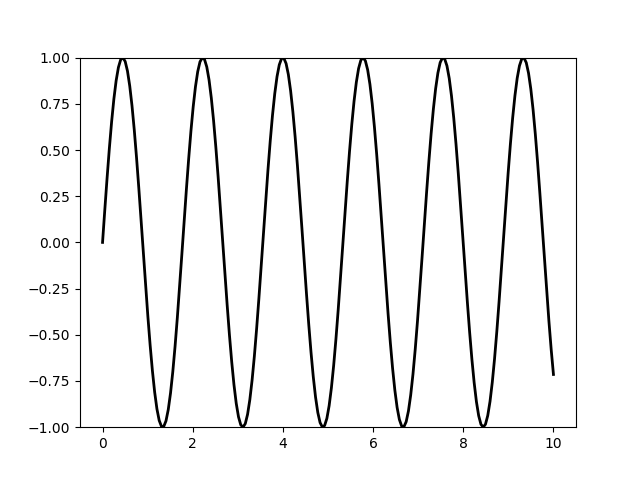
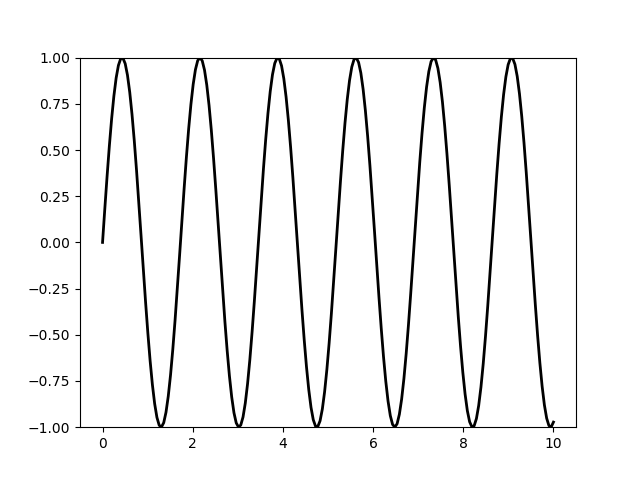
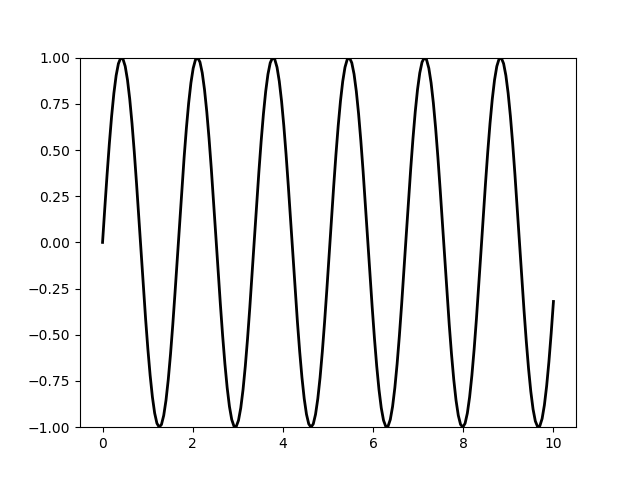
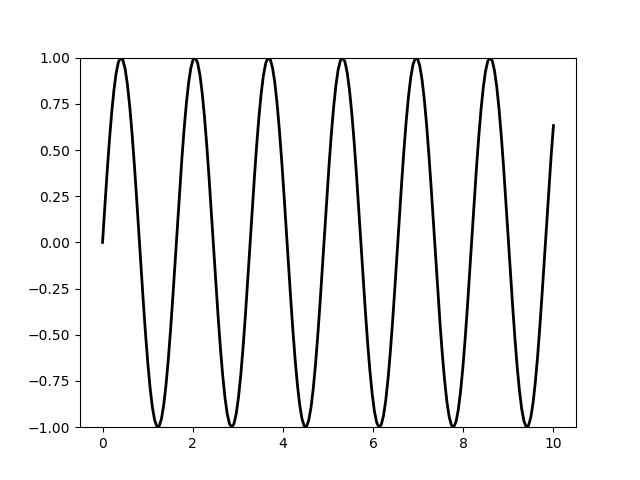
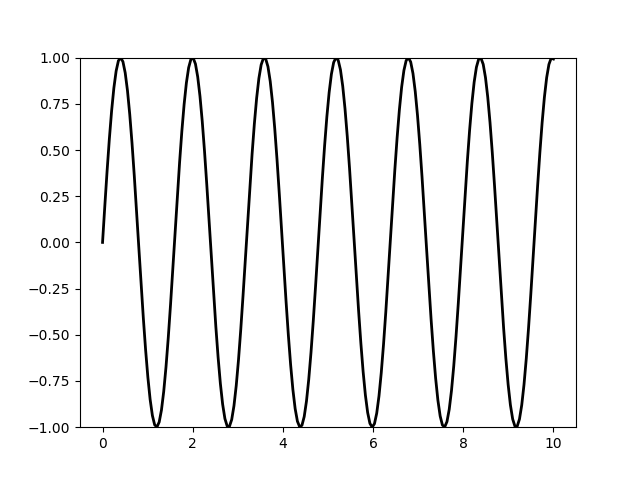
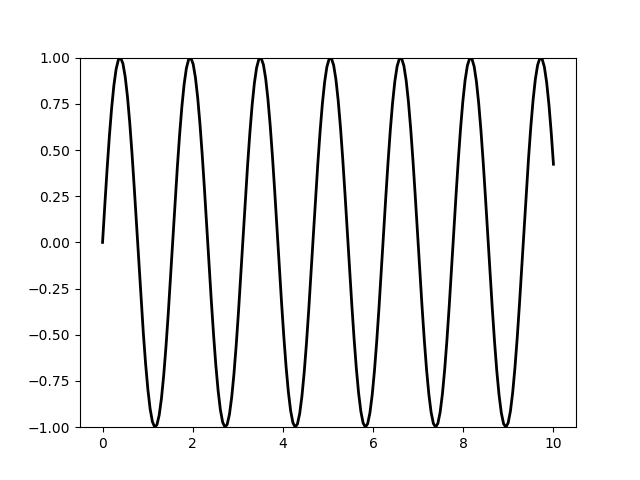
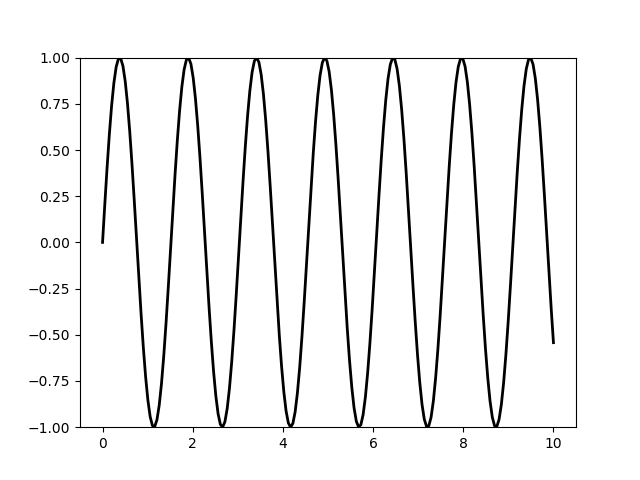
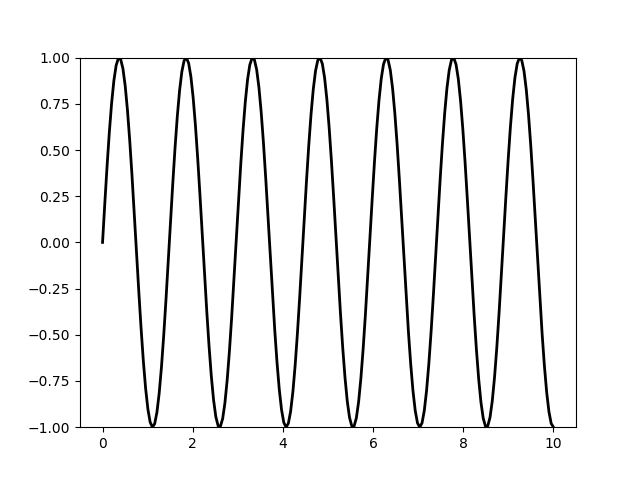
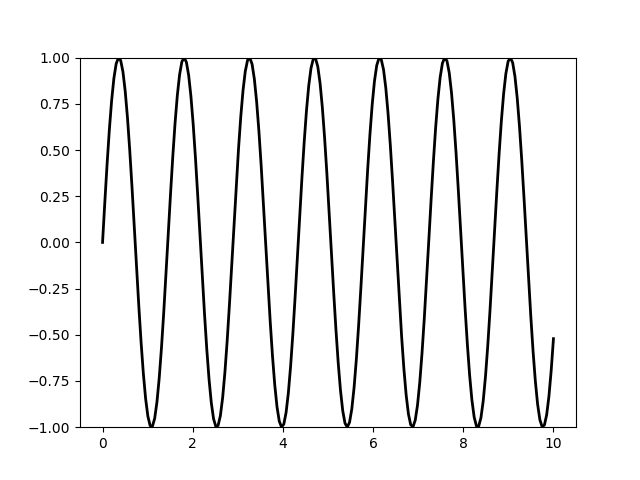
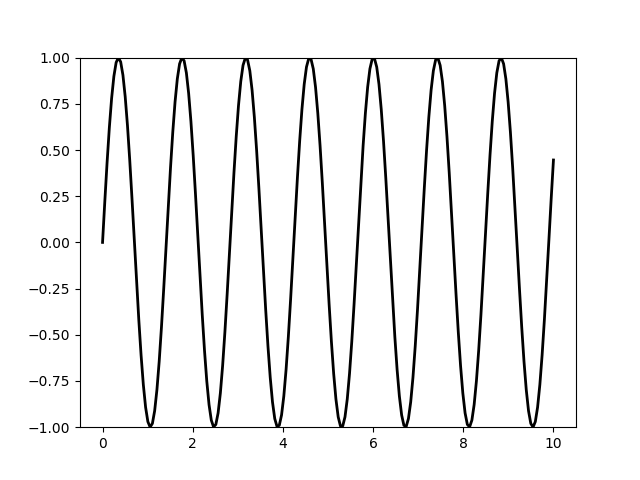
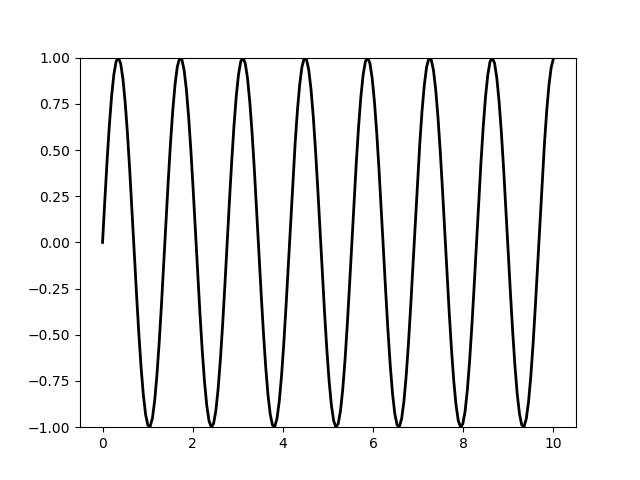
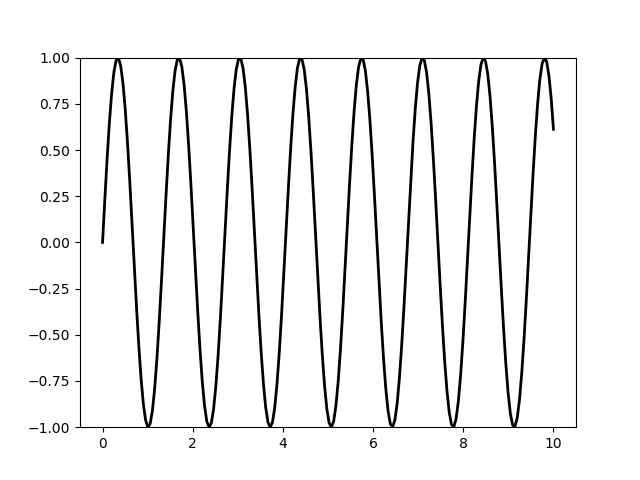
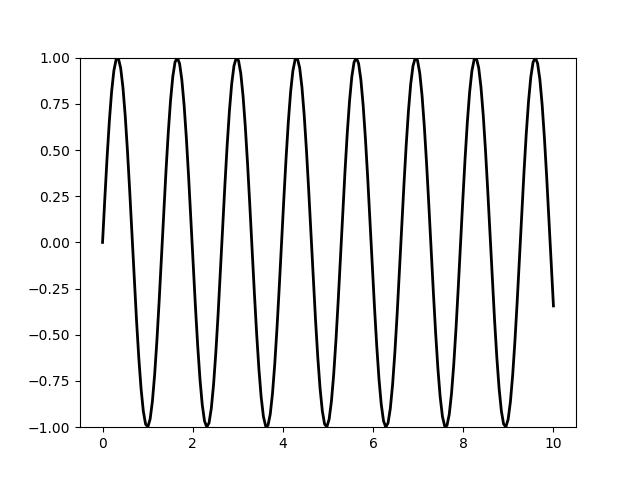
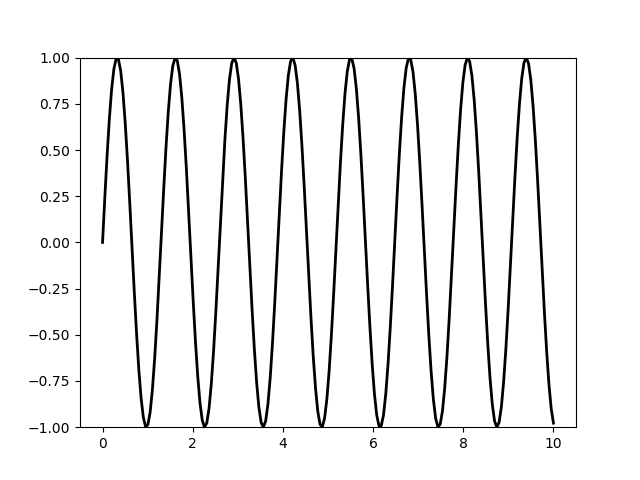
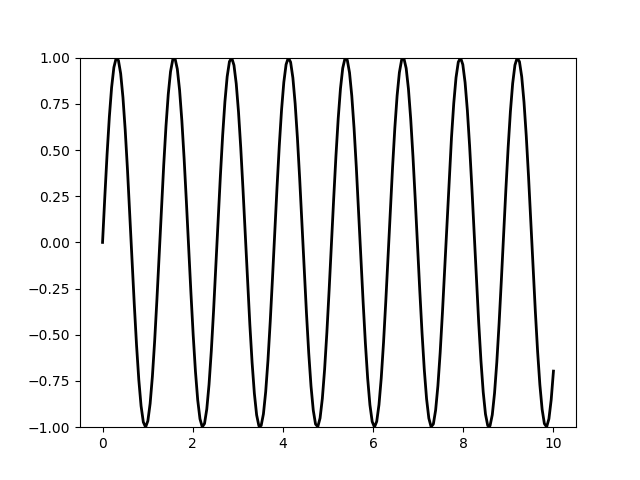
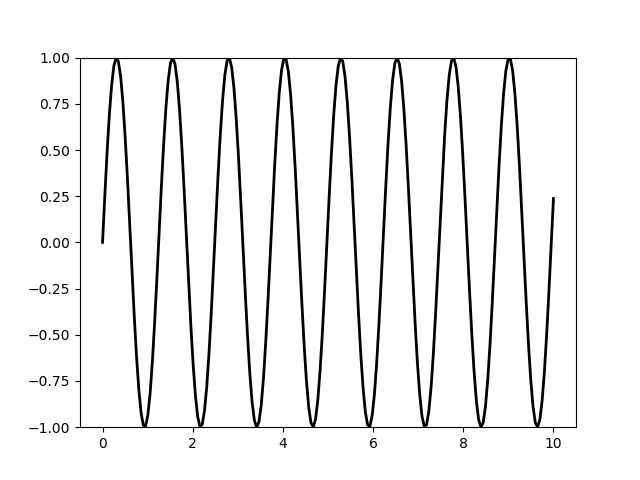
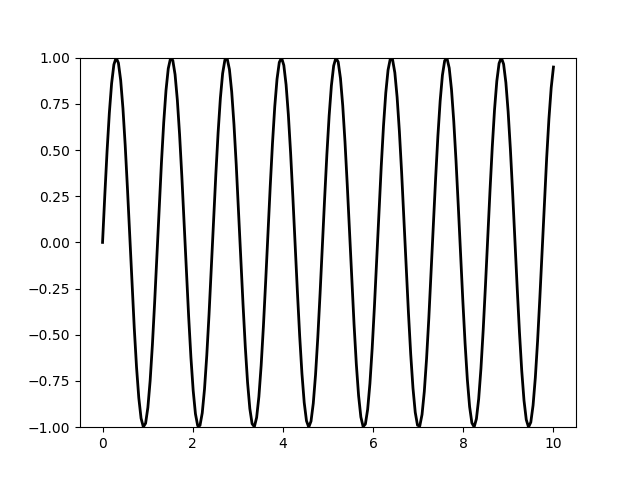
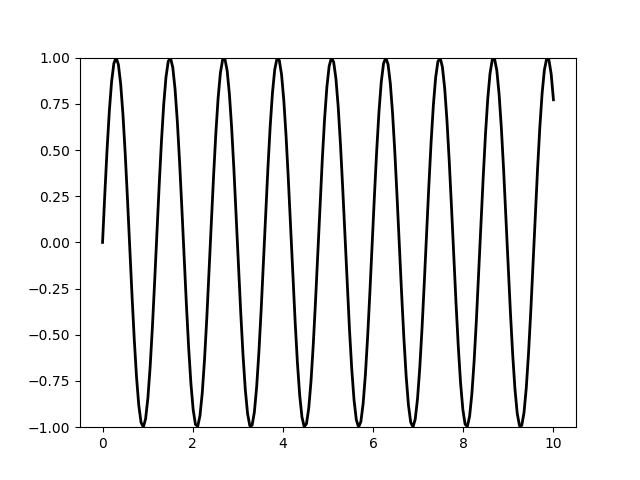
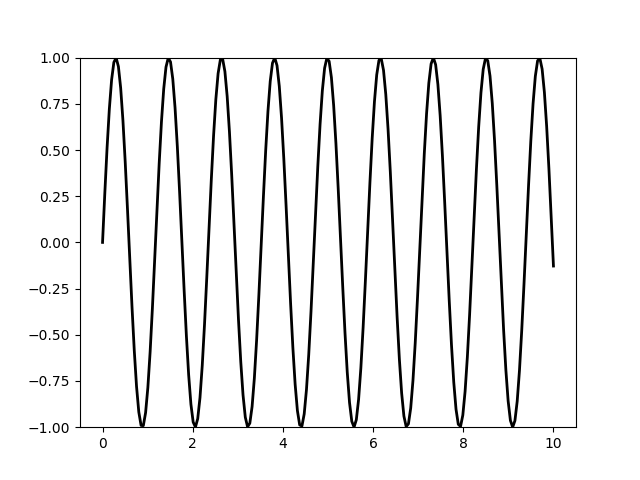
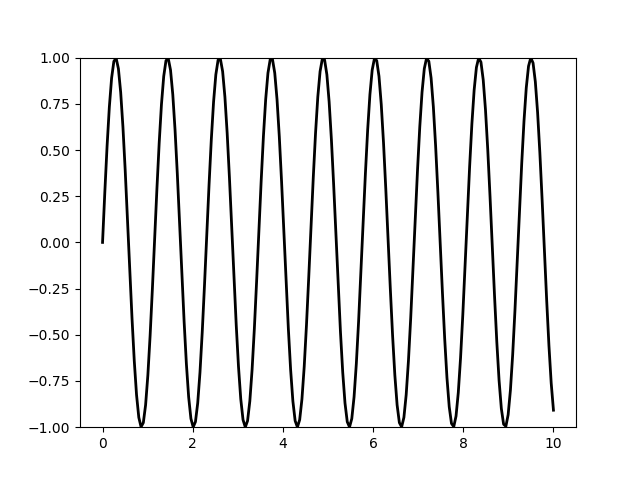
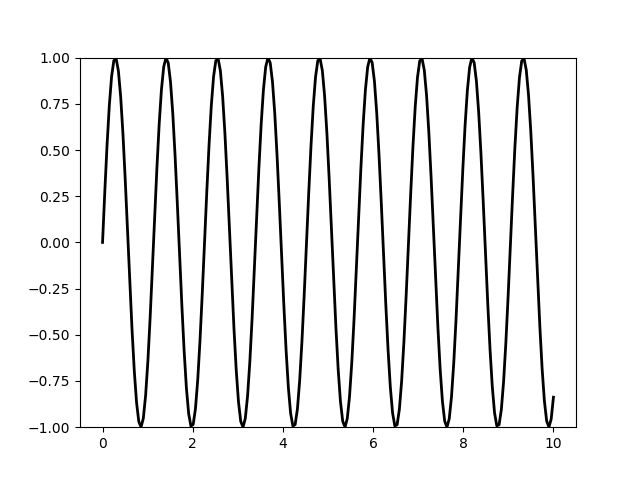
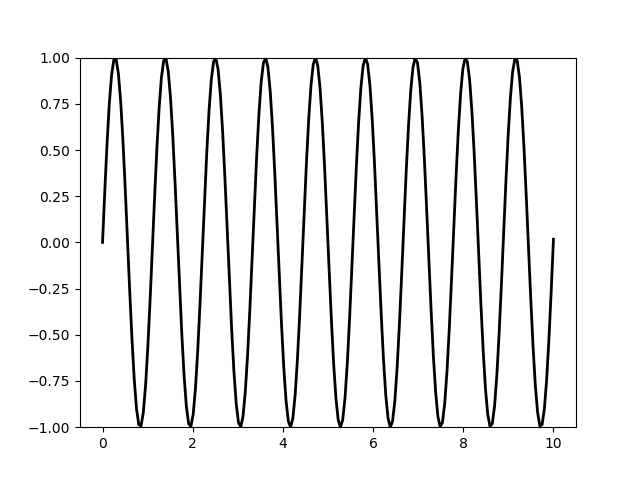
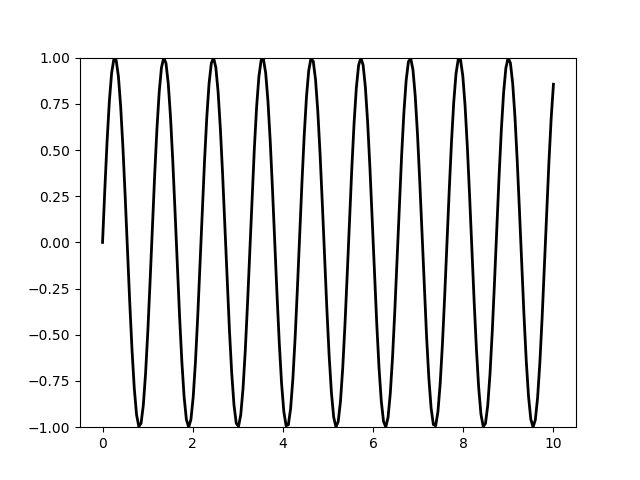
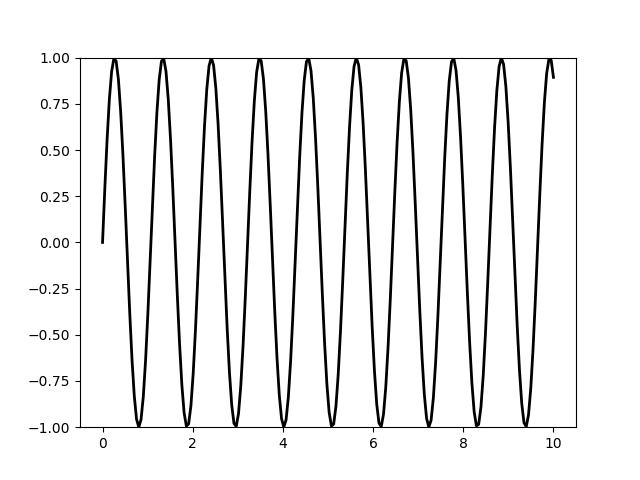
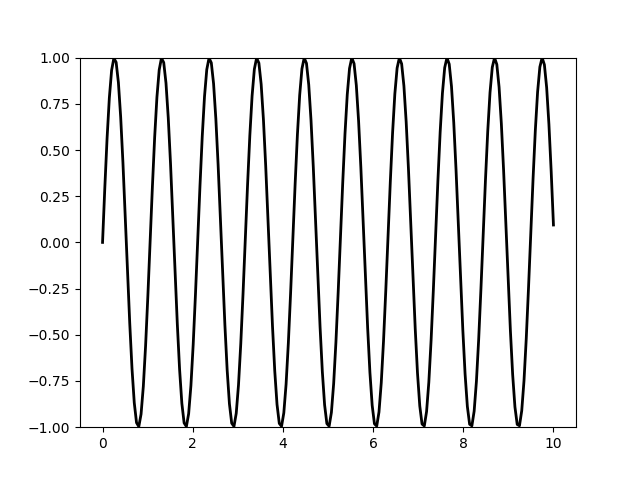
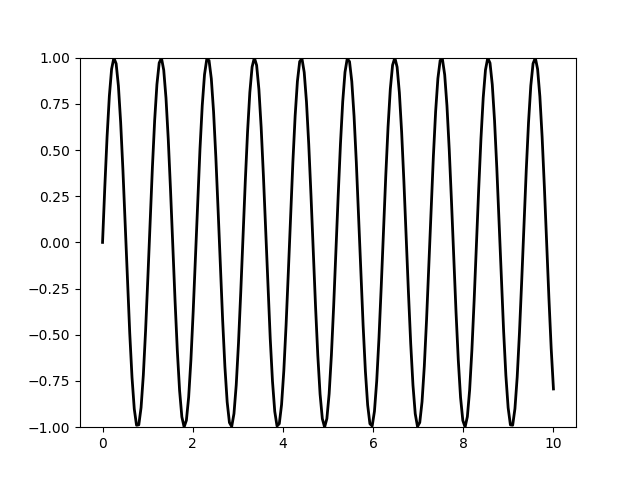
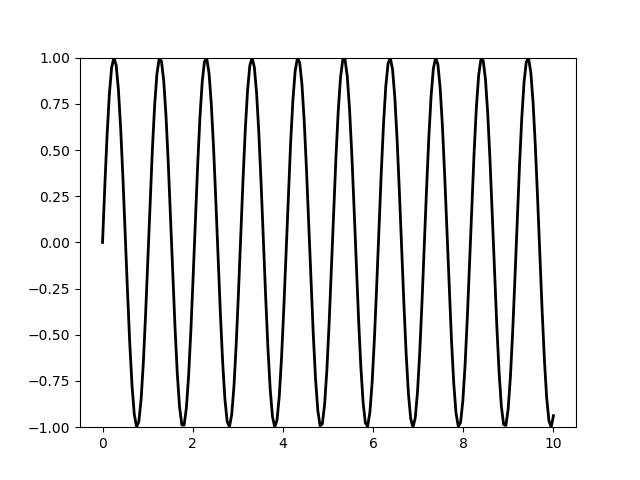
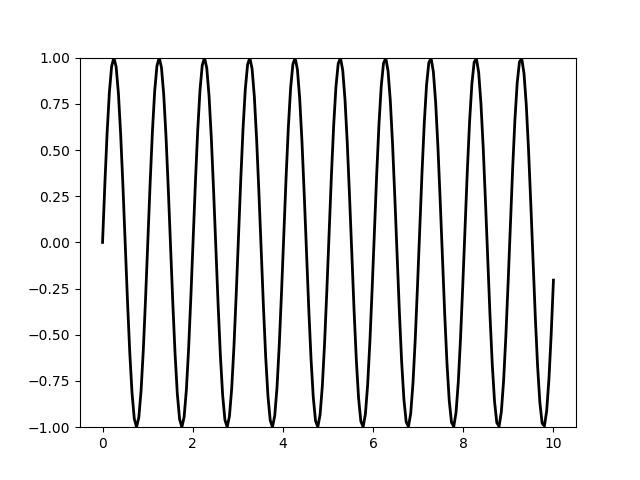
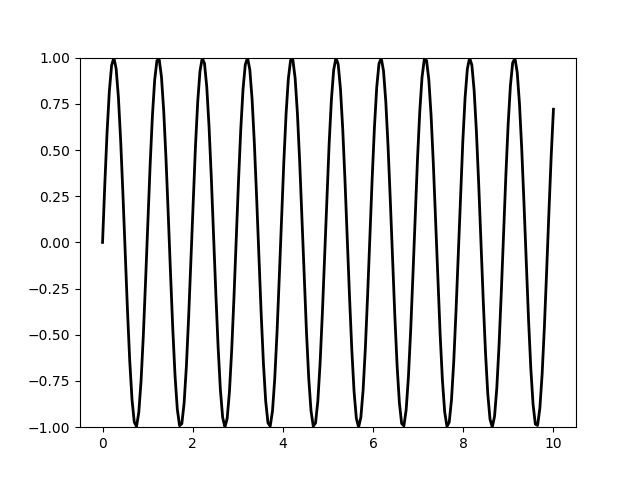
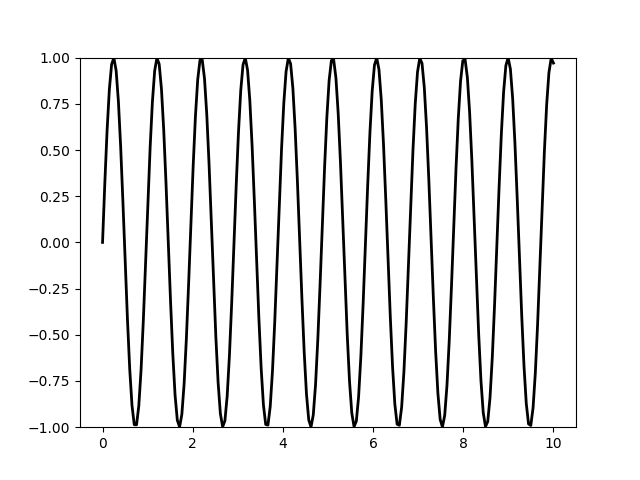
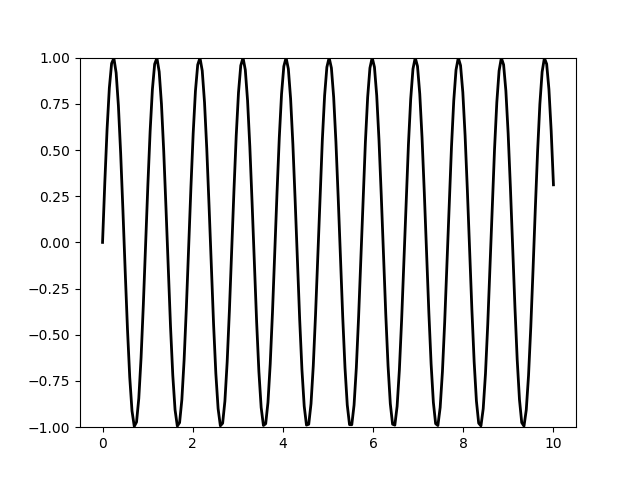
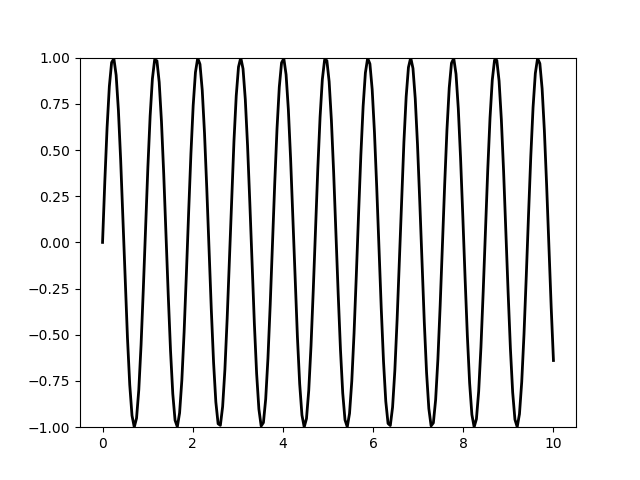
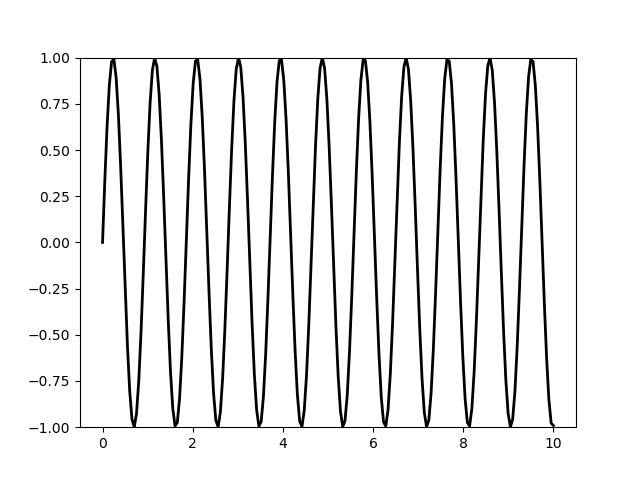
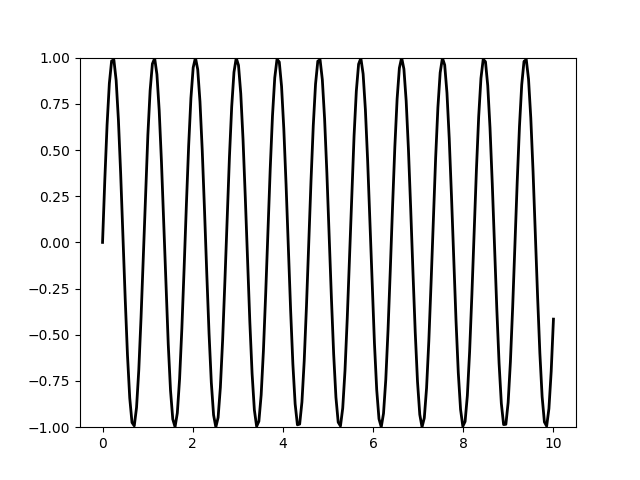
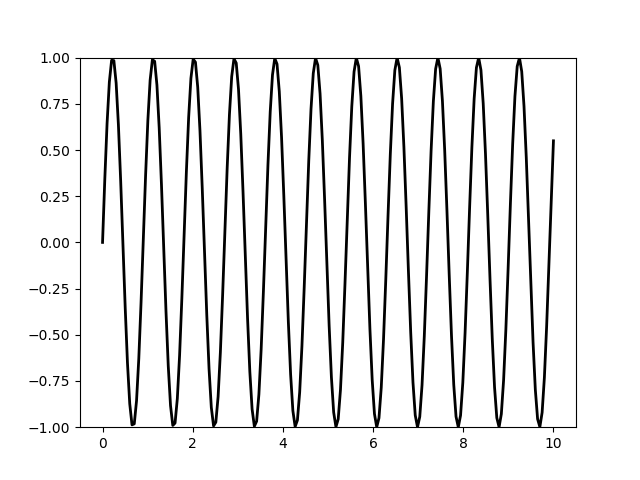
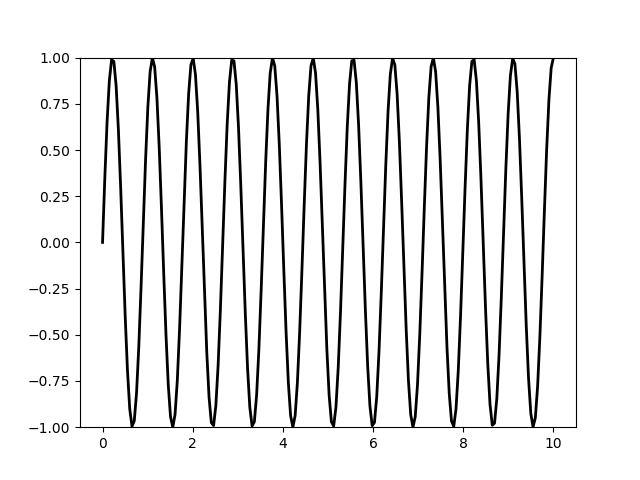
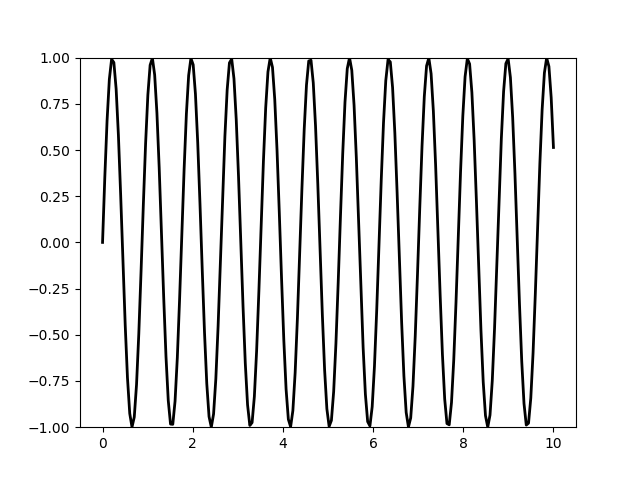
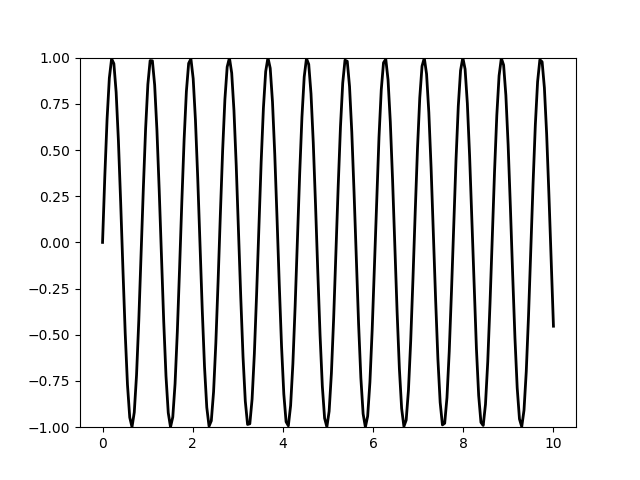
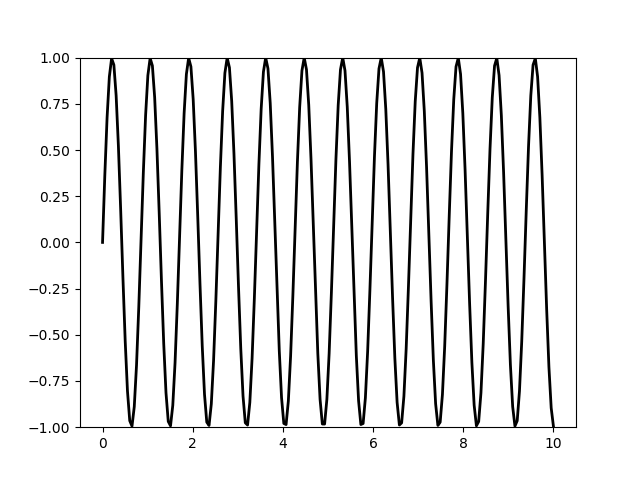
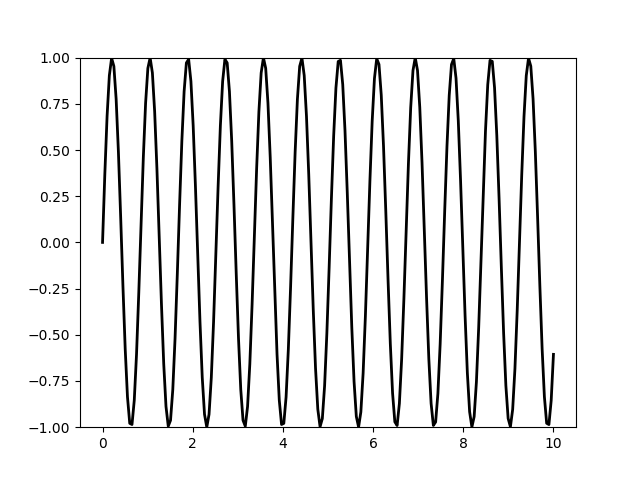
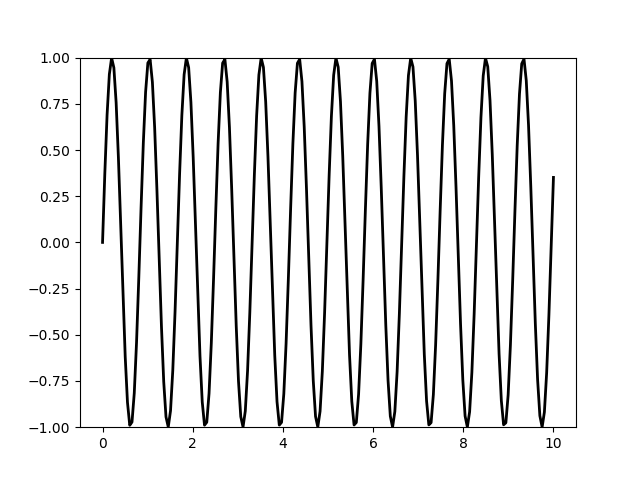
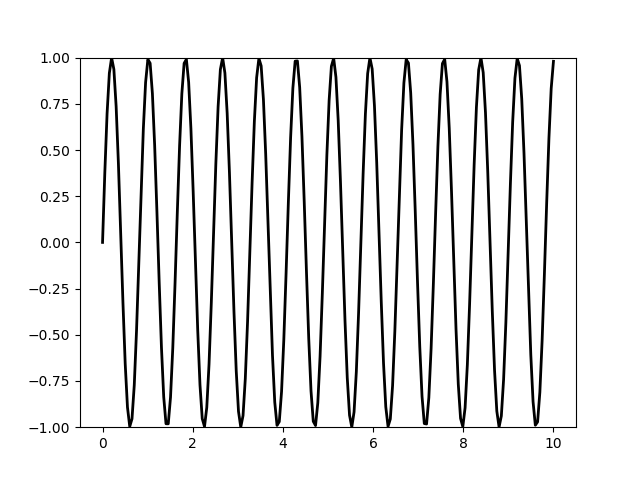
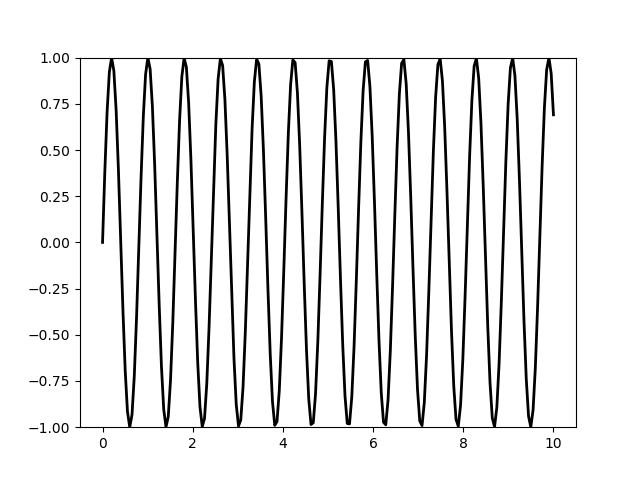
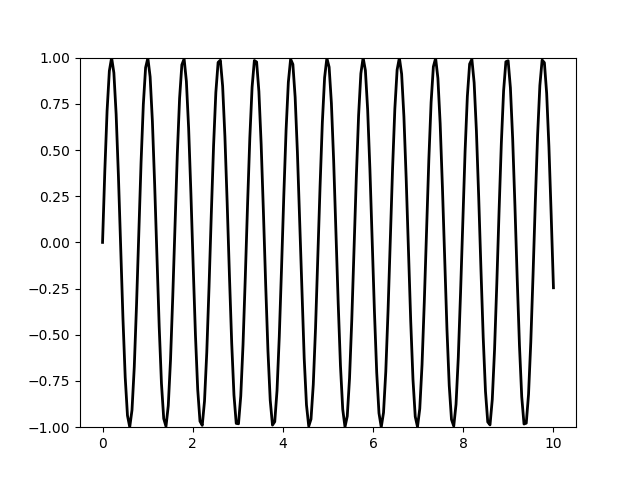
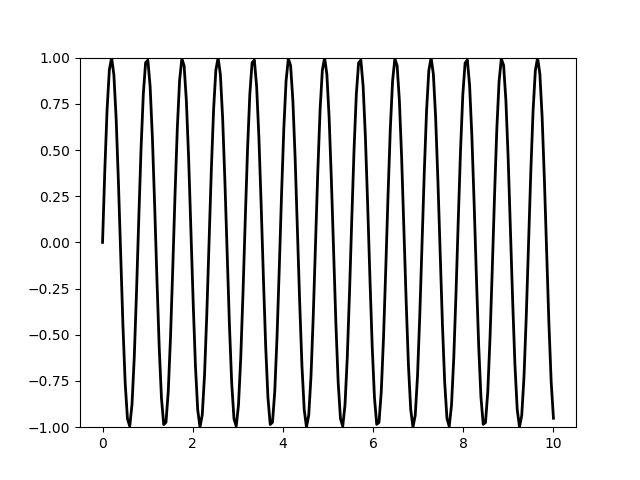
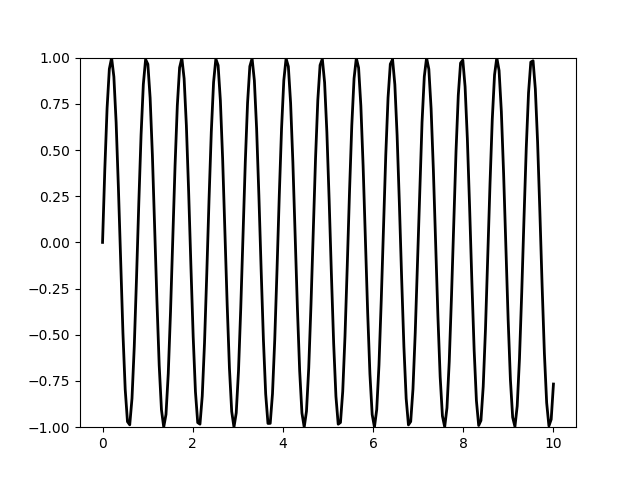
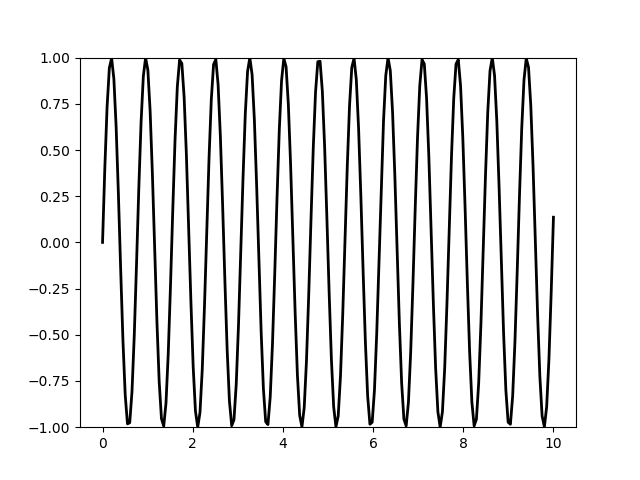
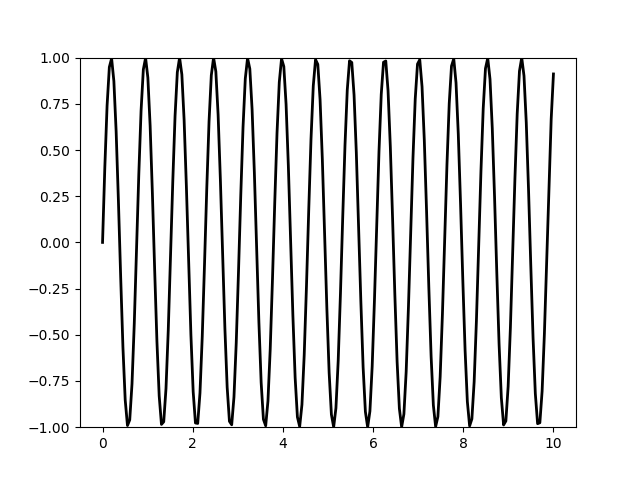
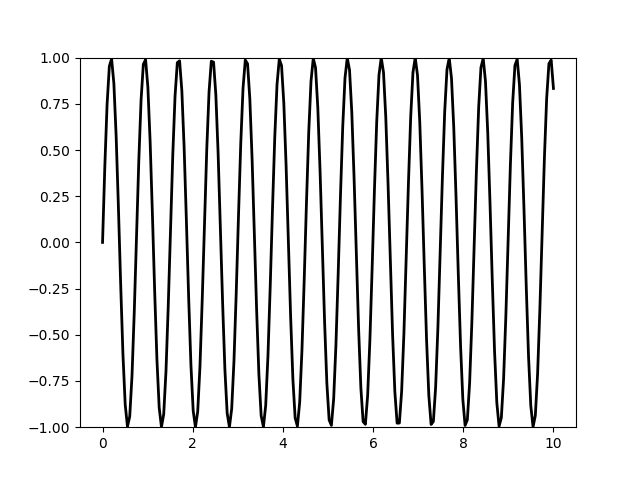
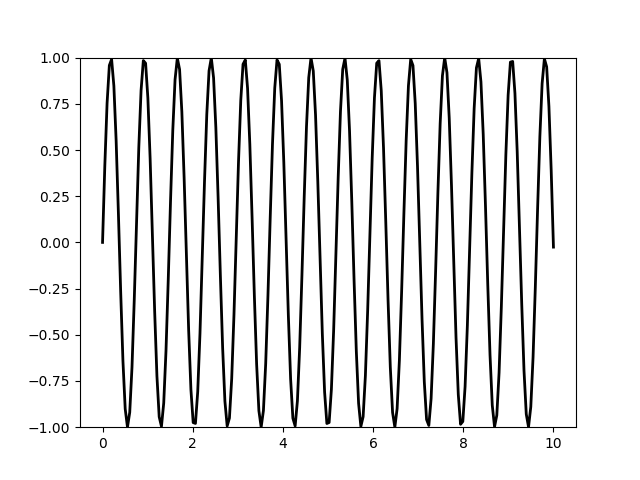
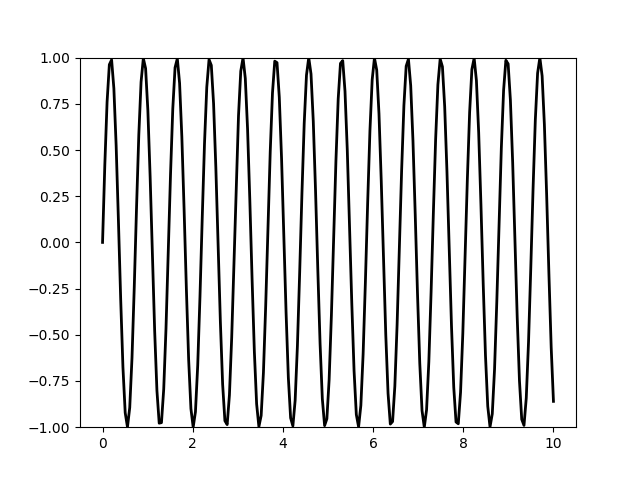
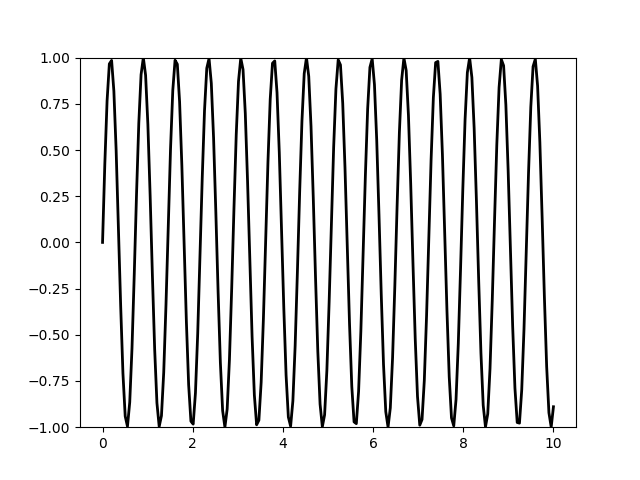
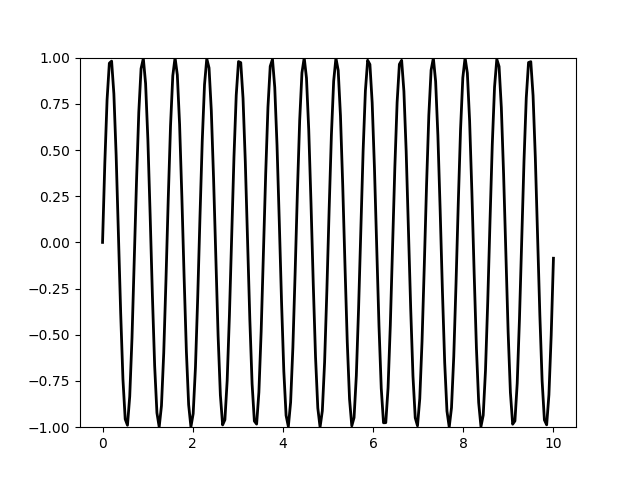
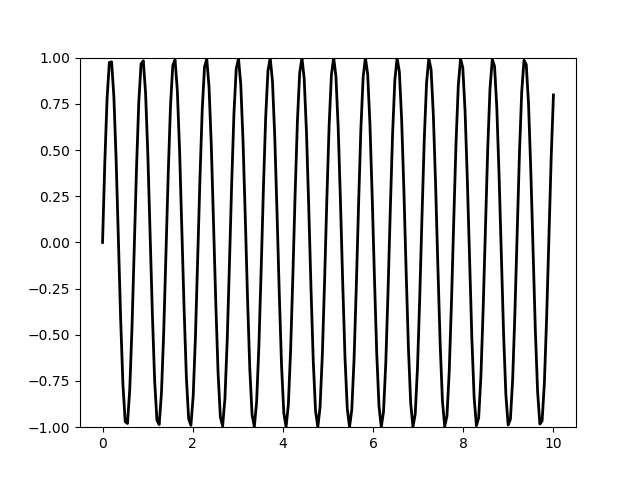
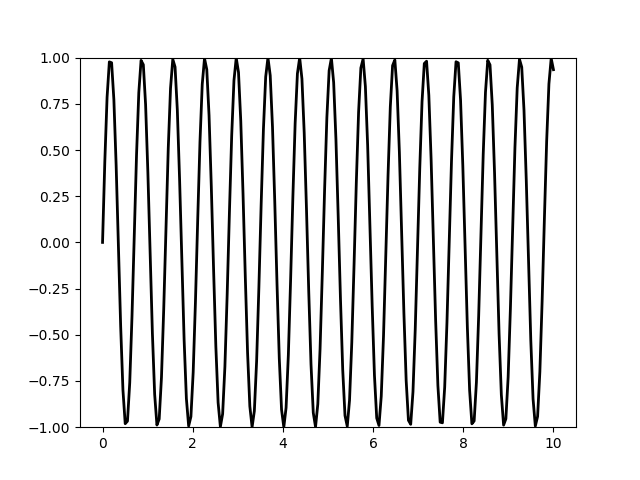
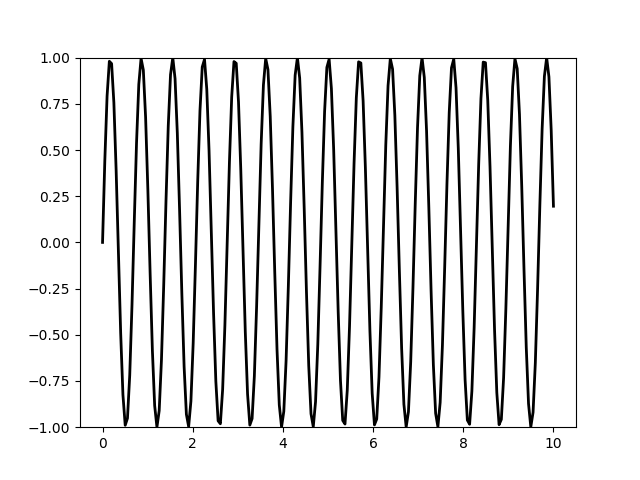
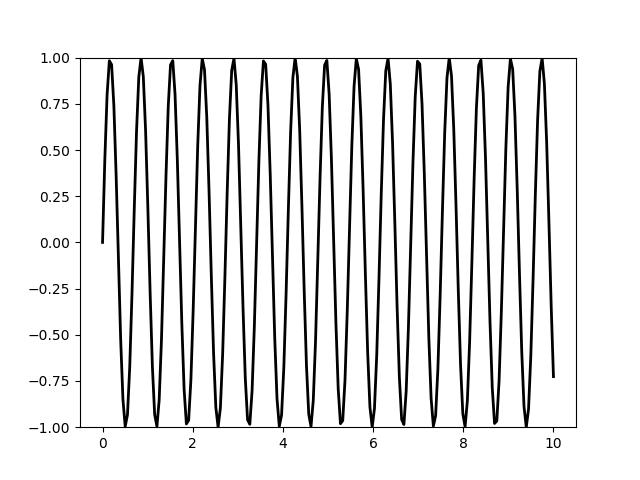
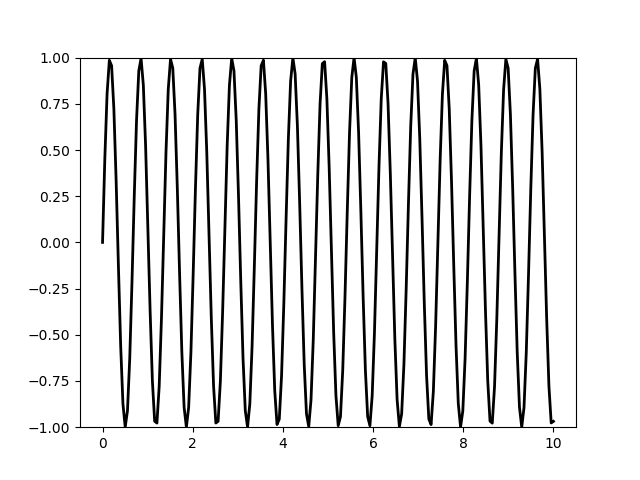
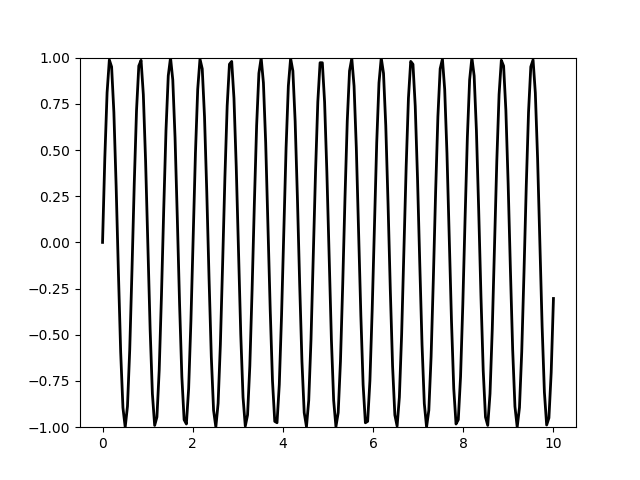
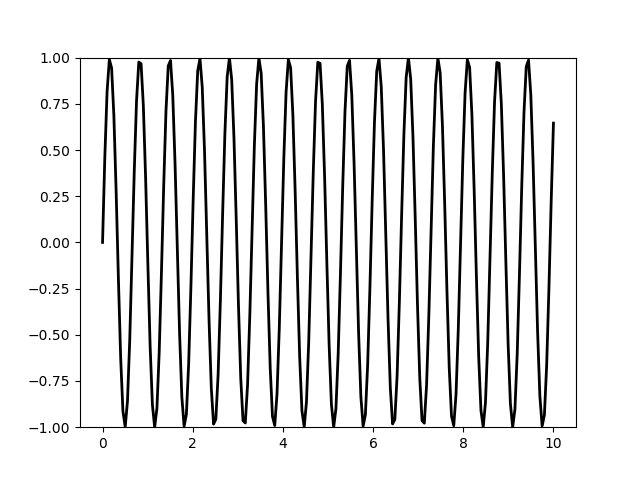
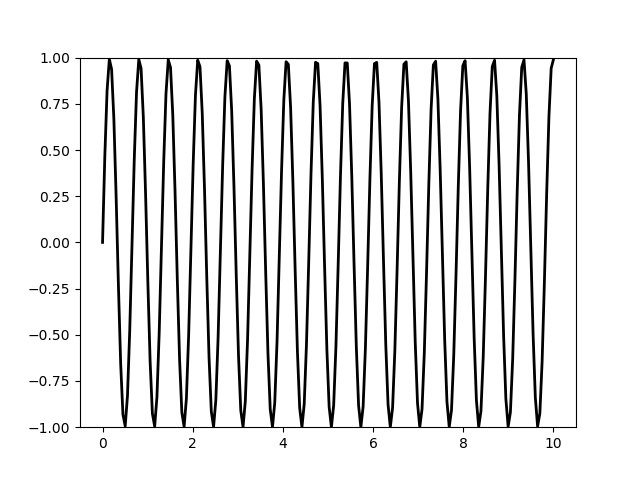
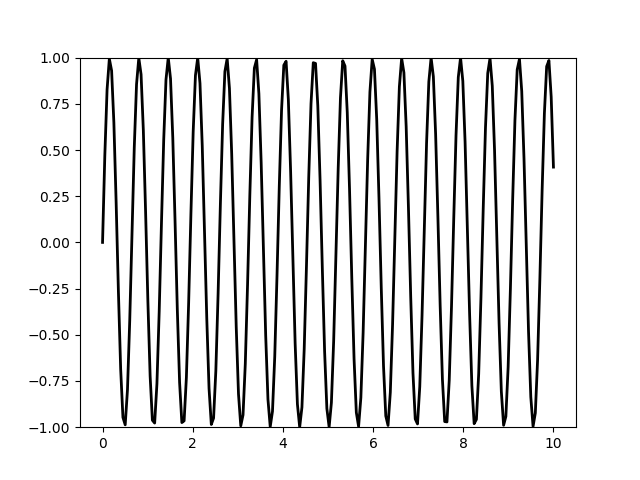
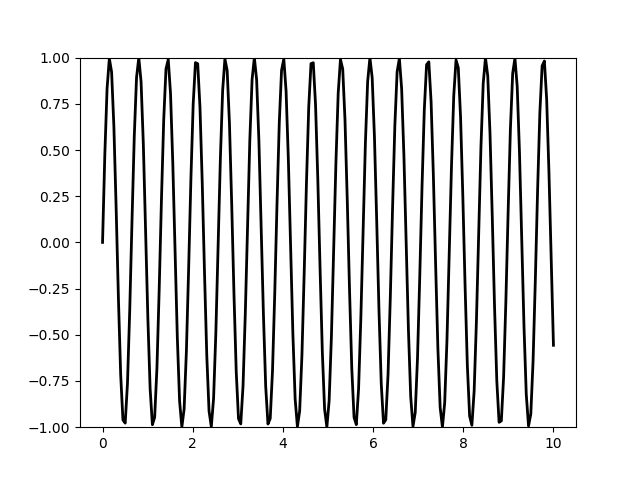
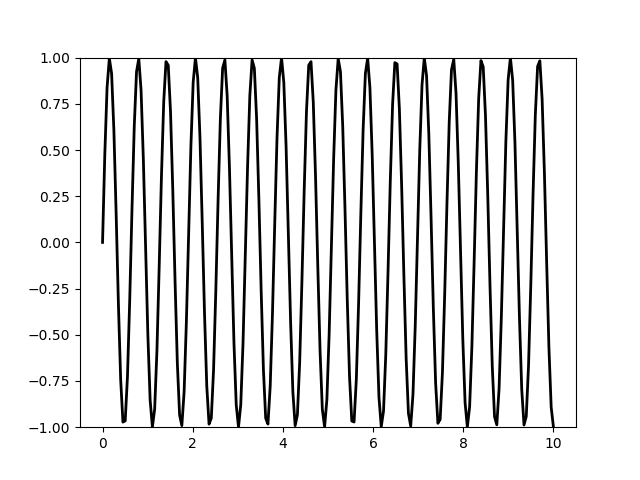
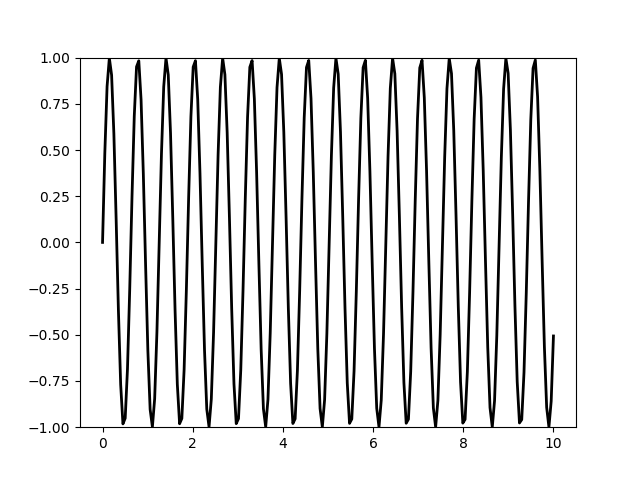

In [16]:
anim